# Insurance Claim Fraud Detection 

## Project Description 

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. 

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.  

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.  

 

Independent Variables 

* months_as_customer: Number of months of patronage 
* 
* age: the length of time a customer has lived or a thing has existed 
* 
* policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer 
* 
* policy_bind_date:date which document that is given to customer after we accept your proposal for insurance 
* 
* policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period 
* 
* policy_csl: is basically Combined Single Limit 
* 
* policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss 
* 
* policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year 
* 
* umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies 
* 
* insured_zip: It is the zip code where the insurance was made 
* 
* insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions 
* 
* insured_education_level: This refers to the Level of education of the customer 
* 
* insured_occupation: This refers Occupation of the customer 
* 
* insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure. 
* 
* insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership 
* 
* capital-gains: This refers to profit accrued due to insurance premium 
* 
* capital-loss: This refers to the losses incurred due to insurance claims 
* 
* incident_date: This refers to the date which claims where made by customers 
* 
* incident_type: This refers to the type of claim/vehicle damage made by customer 
* 
* collision_type: This refers to the area of damage on the vehicle 
* 
* incident_severity: This refers to the extent/level of damage 
* 
* authorities_contacted: This refers to the government agencies that were contacted after damage 
* 
* incident_state: This refers to the state at which the accident happened 
* 
* incident_city: This refers to the city at which the accident happened 
* 
* 1ncident_location: This refers to the location at which the accident happened 
* 
* incident_hour_of_the_day: The period of the day which accident took place 
* 
* number_of_vehicles_involved: This refers to number of vehicles involved the accident 
* 
* property_damage: This refers to whether property was damaged or not 
* 
* bodily_injuries: This refers to injuries sustained 
* 
* witnesses: This refers to the number of witnesses involved 
* 
* police_report_available: This refers to whether the report on damage was documented or not 
* 
* total_claim_amount: This refers to the financial implications involved in claims 
* 
* injury_claim: This refers to physical injuries sustained 
* 
* property_claim: This refers to property damages during incident 
* 
* vehicle_claim: This refers to property damages during incident 
* 
* auto_make: This refers to the make of the vehicle 
* 
* auto_model: This refers to the model of the vehicle 
* 
* auto_year: This refers to the year which the vehicle was manufactured 
* 
* _c39: 
* 
* fraud_reported 

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import stats
import scipy.stats as stats
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [2]:
# loading the data into dataframe and checking random 5 rows of the dataset
df = pd.read_csv("Automobile_insurance_fraud.csv",encoding="utf-8")
df.sample(15)

months_as_customer  age  policy_number policy_bind_date policy_state  \
280                 259   39         330506       19-09-1995           OH   
97                   29   25         235220       01-11-2014           IL   
488                 294   46         735307       02-06-2010           IL   
782                 233   41         728491       30-08-1997           OH   
486                 128   29         743330       04-11-2010           OH   
581                 143   31         425631       05-07-2014           IL   
442                 152   33         107181       14-11-1999           IN   
913                 259   45         608443       21-12-2006           IL   
386                 236   38         873859       14-10-1992           OH   
340                 290   45         583169       01-02-1998           IL   
510                 209   38         116735       28-01-2010           OH   
810                 259   43         871305       14-02-1992           IL   
356                 229   37         340614       01-06-1997           IL   
644                 254   40         463513       23-04-1995           IL   
864                 398   53         793948       20-12-1990           IL   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
280    250/500               1000                1422.36               0   
97     250/500               2000                1352.83               0   
488    100/300                500                1532.80               0   
782   500/1000               2000                1615.14               0   
486   500/1000               1000                1878.44               0   
581    250/500                500                1163.83               0   
442    250/500                500                 942.51               0   
913   500/1000               2000                1175.07               0   
386    250/500               1000                 802.24               0   
340    100/300                500                1085.03               0   
510    250/500                500                1191.50               0   
810   500/1000               2000                1537.13               0   
356    250/500               2000                1212.12               0   
644    250/500                500                1390.89         5000000   
864    100/300               2000                1396.43               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
280       604668      FEMALE                      JD       craft-repair   
97        464959        MALE                 Masters    farming-fishing   
488       473935        MALE                 College     prof-specialty   
782       606638      FEMALE               Associate       tech-support   
486       450746        MALE             High School      other-service   
581       604874        MALE               Associate    protective-serv   
442       478981      FEMALE                     PhD   transport-moving   
913       457121        MALE                      MD       craft-repair   
386       612597      FEMALE                 College      other-service   
340       476303      FEMALE                      JD              sales   
510       442866        MALE             High School    priv-house-serv   
810       471614      FEMALE                     PhD  handlers-cleaners   
356       446544      FEMALE                      MD       craft-repair   
644       453719        MALE                 College       armed-forces   
864       448722      FEMALE               Associate    priv-house-serv   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
280          movies            unmarried              0        -83900   
97        skydiving            own-child              0        -71700   
488        exercise            own-child              0             0   
782     board-games       other-relative          67100       

* we can see that values in some columns are missing and represented by ? . we will handle that in further analysis.

In [3]:
# checking the shape of the dataset
df.shape

(1000, 40)

In [4]:
# checking description of the numerical columns
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [5]:
df.duplicated().sum()

0

In [6]:
# getting informaiton about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

* After looking into the info 40 columns from which _c39 have no values we will drop that columns. dataset include 2float,17int,and 21objects datatypes.

In [7]:
# dropping the _c39
df.drop('_c39',axis=1,inplace= True)

In [8]:
# checking the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

##  checking missing values

In [9]:
df.isin([' ','NA','-' ]).sum().any()

False

In [10]:
df.isin(['?']).sum().any()

True

In [11]:
# replace ? with nan value
df  = df.replace('?',np.NaN)

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
auto_model                                0             0.0
auto_make                                 0             0.0
vehicle_claim                             0             0.0
property_claim                            0             0.0
injury_claim                              0             0.0
total_claim_amount                        0             0.0
incident_severity                         0             0.0
witnesses                                 0             0.0
bodily_injuries                           0             0.0
auto_year                                 0             0.0
number_of_vehicles_involved               0             0.0
incident_hour_of_the_day                  0             0.0
incident_location                       

* 'property_damage','police_report_available','collision_type' contain missing values.

* These missing value feature are categorical in nature. We gone impute them with mode of that particular category.

## Handling Missing values of the categorical features with mode .

In [13]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [14]:
# Droping unnecessary columns
df.drop(['incident_location','insured_zip','policy_number'],axis=1,inplace=True)

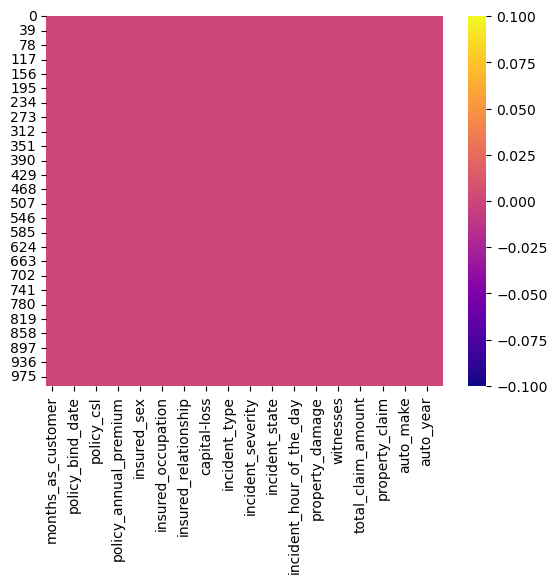

In [15]:
# checking null now
sns.heatmap(df.isnull(),cmap="plasma")
plt.show()

### No missing values in the dataset now . we can do further  analysis .

In [16]:
# handling the datetime values
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_sex                  1000 non-null   object        
 9   insured_education_level      1000 non-null   object        
 10  insured_occupation           1000 non-null   object        
 11  insured_hobbies              1000 non-null  

In [18]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [19]:
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   
1       2007              Y               27                  6   
2       2007              N                9                  6   
3       2014              Y               25                  5   
4       2009              N                6                  6   

   policy_bind_year  incident_day  incident_month  i

### handling the policy_csl
* Combined Single Limit (CSL): Instead of splitting the coverage into different categories, a CSL policy provides a single lump-sum maximum coverage amount that can be used for any combination of bodily injury and property damage resulting from an accident. It doesn't distinguish between the different types of damages; the entire limit can be used to cover bodily injury, property damage, or a combination of both.

* In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.we will split the column into two part CSL_accditental and CSL_overall


In [20]:
# Spliting and extracting policy_csl at '/'
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Overall']=df.policy_csl.str.split('/',expand=True)[1]

In [21]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [22]:
### split the columns into numeric and categorical 
numerical_columns = [num_col for num_col in df.columns if df[num_col].dtype != 'O']
categorical_columns = [cat_col for cat_col in df.columns if df[cat_col].dtype == 'O']


In [23]:
numerical_columns

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_day',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month',
 'incident_year']

In [24]:
categorical_columns

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'CSL_Accidental',
 'CSL_Overall']

In [25]:
## checking unique values of the categorical column
for cat in df[categorical_columns]:
    print("____________________________________________________________________")
    print(df[cat].name)
    
    print(df[cat].unique())

____________________________________________________________________
policy_state
['OH' 'IN' 'IL']
____________________________________________________________________
insured_sex
['MALE' 'FEMALE']
____________________________________________________________________
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
____________________________________________________________________
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
____________________________________________________________________
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
_______

# Univariate analysis

<AxesSubplot:>

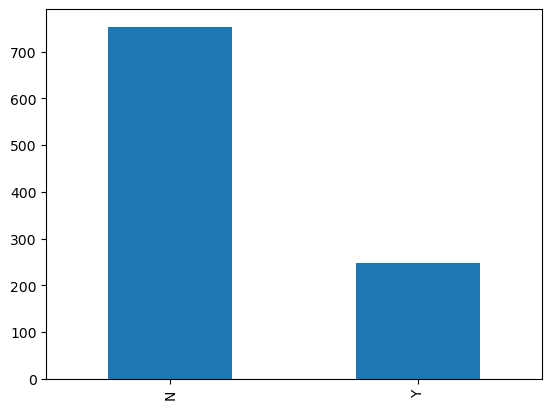

In [26]:
# checking the distribution in the target column 
df.fraud_reported.value_counts().plot(kind='bar')


* The target column is heavily imbalanced . will fixed that in the further analysis

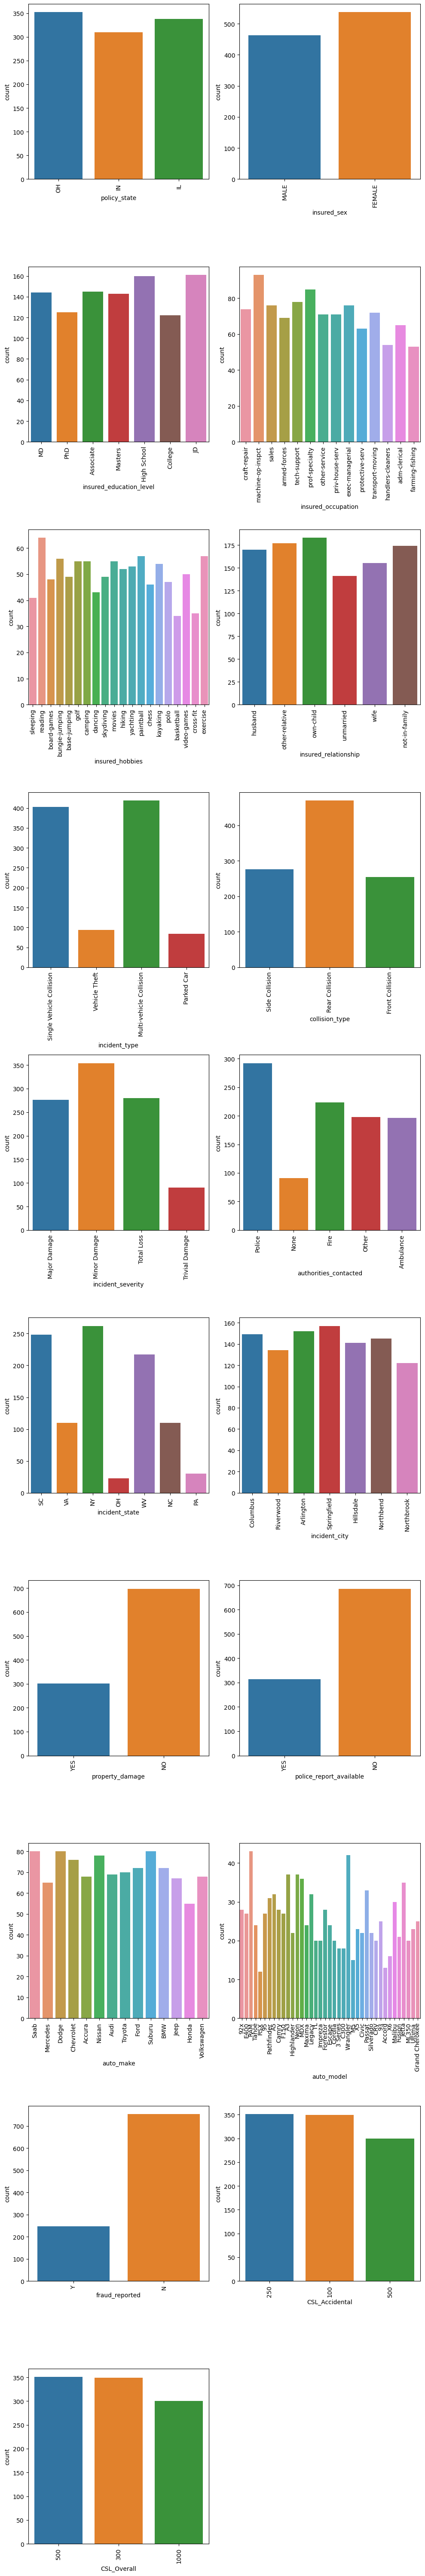

In [27]:
# Create the subplots
fig = plt.figure(figsize=(10, 60))

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_columns):
    plt.subplot(10, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

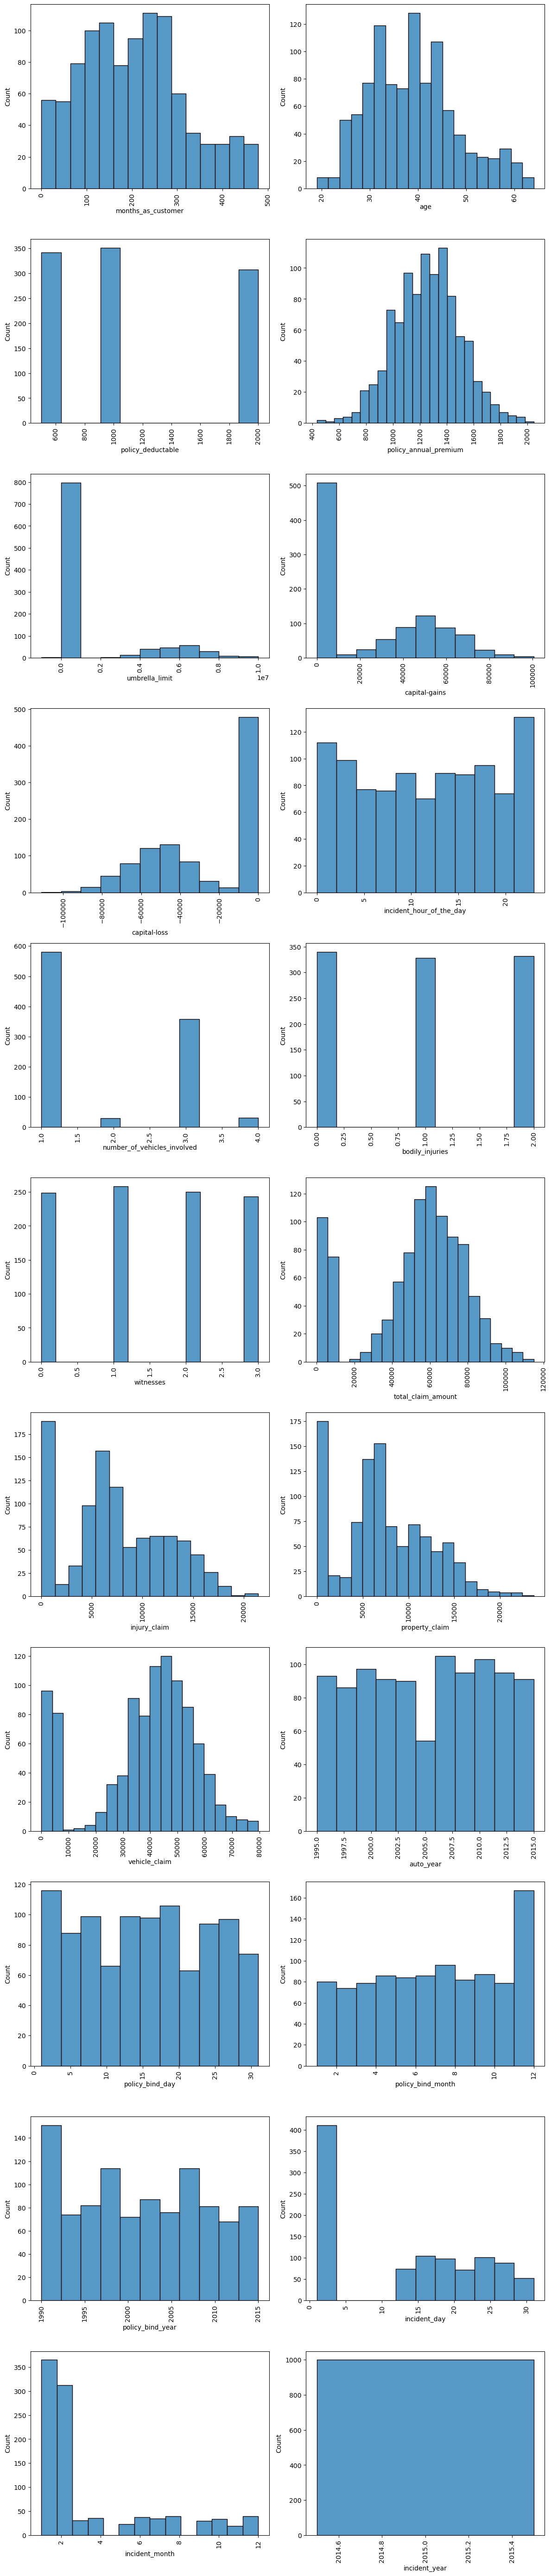

In [28]:
# Create the subplots
fig = plt.figure(figsize=(12, 60))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_columns):
    plt.subplot(12, 2, i + 1)
    sns.histplot(data=df, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

##### Data in continous columns seem to bee normally distributed

# bivariate analysis

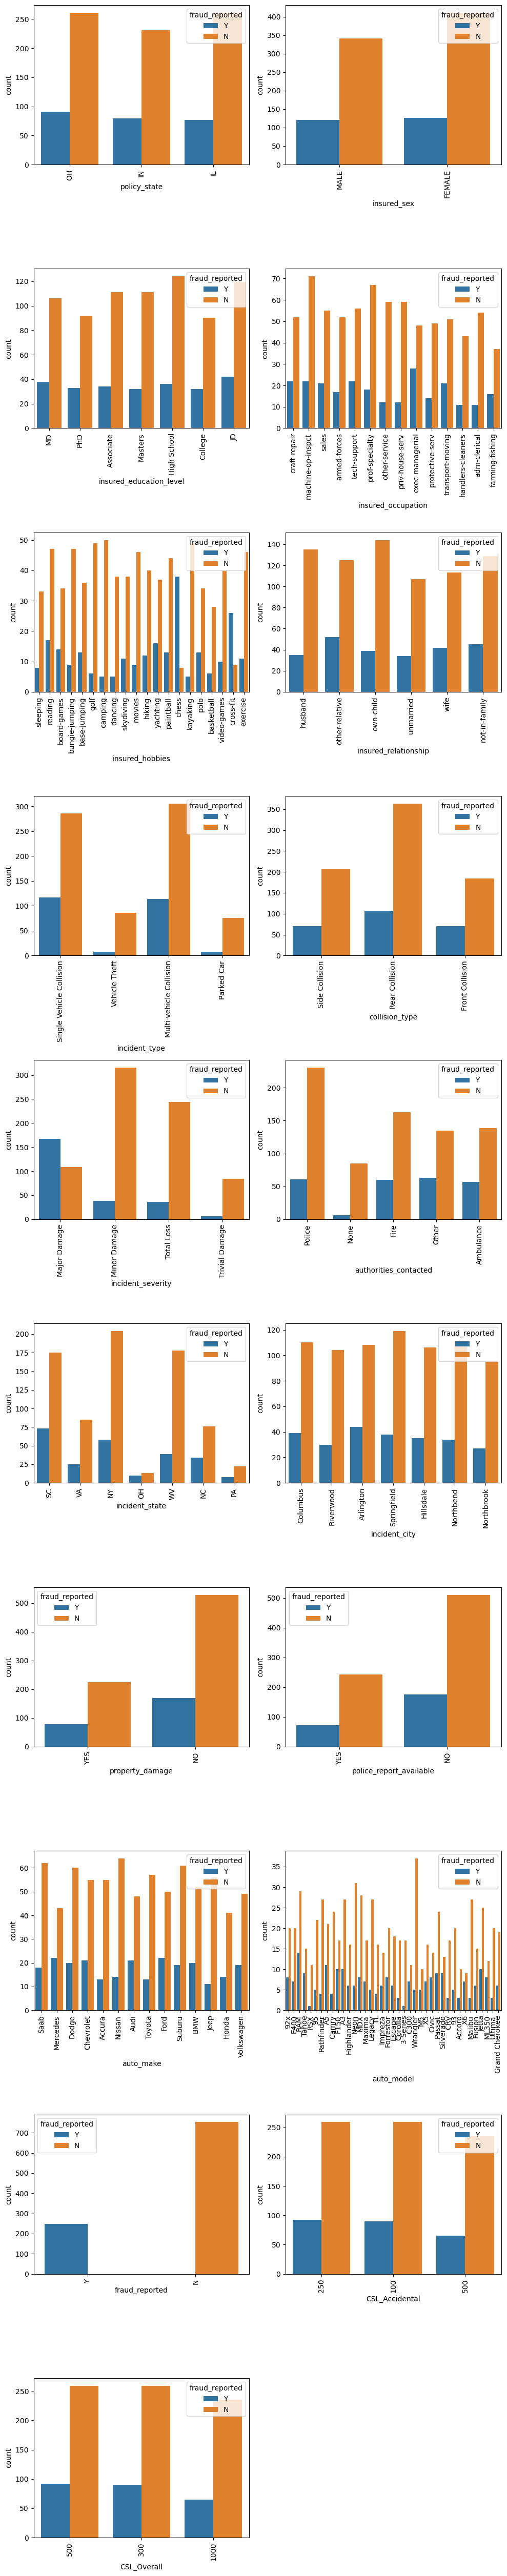

In [29]:
# Create the subplots 
fig = plt.figure(figsize=(10, 60)) # bivariate analysis categorical and income column

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_columns):
    plt.subplot(12, 2, i + 1)
    sns.countplot(data=df, x=col,hue=df['fraud_reported'])
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


* people with the hobby of chess and crossfit have highest chance to fraud reported
* in other column data looks normal 

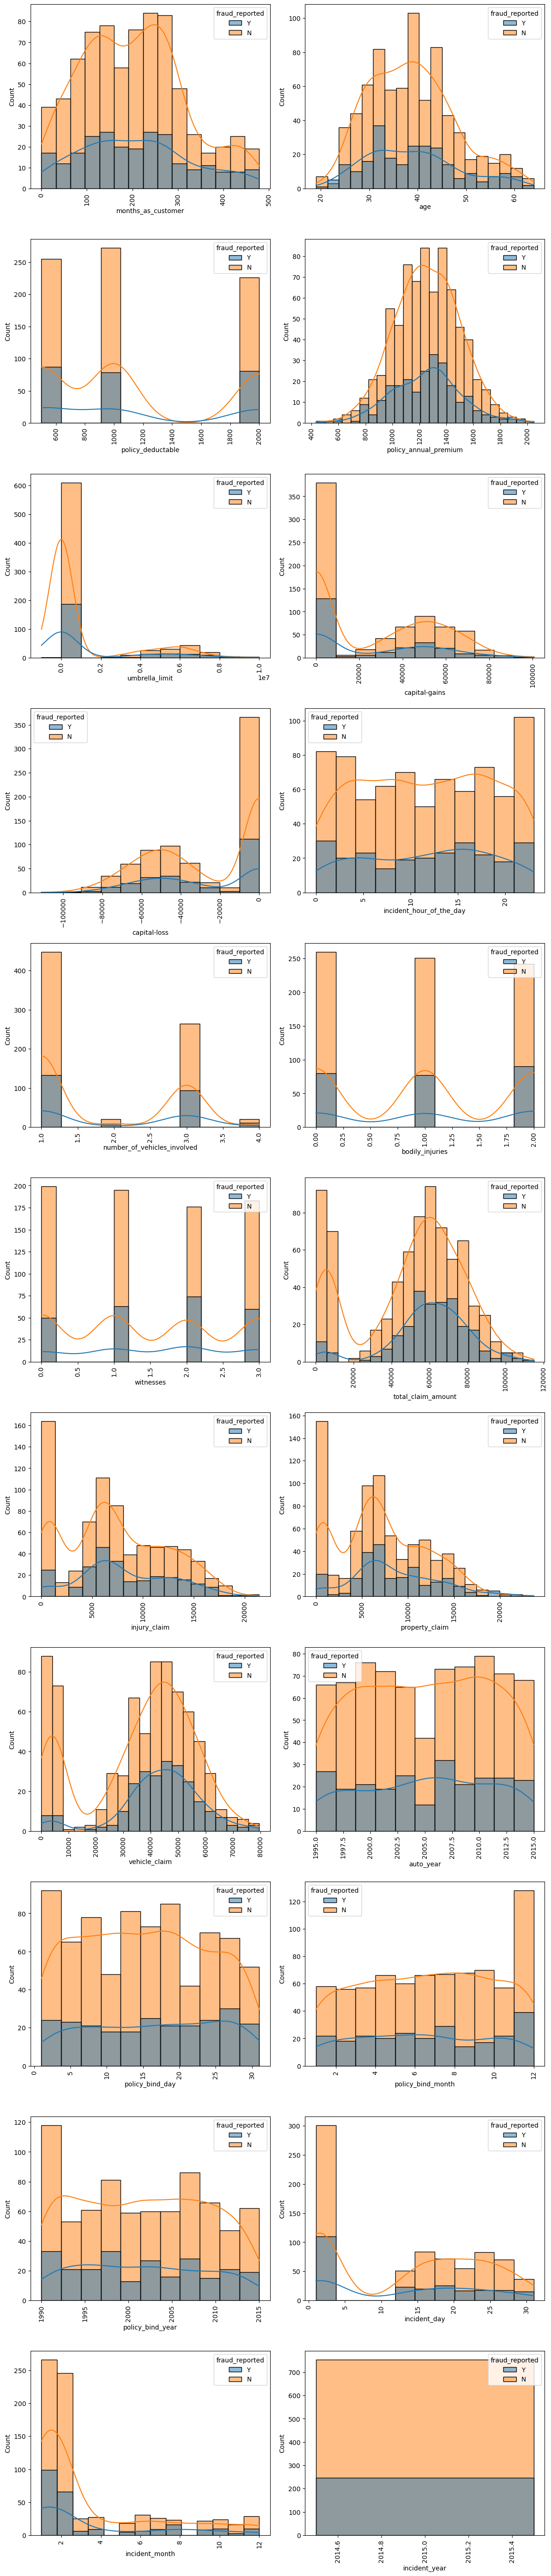

In [30]:
# Create the subplots
fig = plt.figure(figsize=(12, 60))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_columns):
    plt.subplot(12, 2, i + 1)
    sns.histplot(data=df, x=col,hue=df['fraud_reported'],kde=True)
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

* In first two months people purchase permium the most and these to month have highest chances to have fraud reported.
* the fraud reported in the first week of the month most of time .


#### Bivariate analysis feature with feature

In [31]:
df.head()


months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   
1       2007              Y               27                  6   
2       2007              N                9                  6   
3       2014              Y               25                  5   
4       2009              N                6                  6   

   policy_bind_year  incident_day  incident_month  incident_year  \
0              2014            25               1 

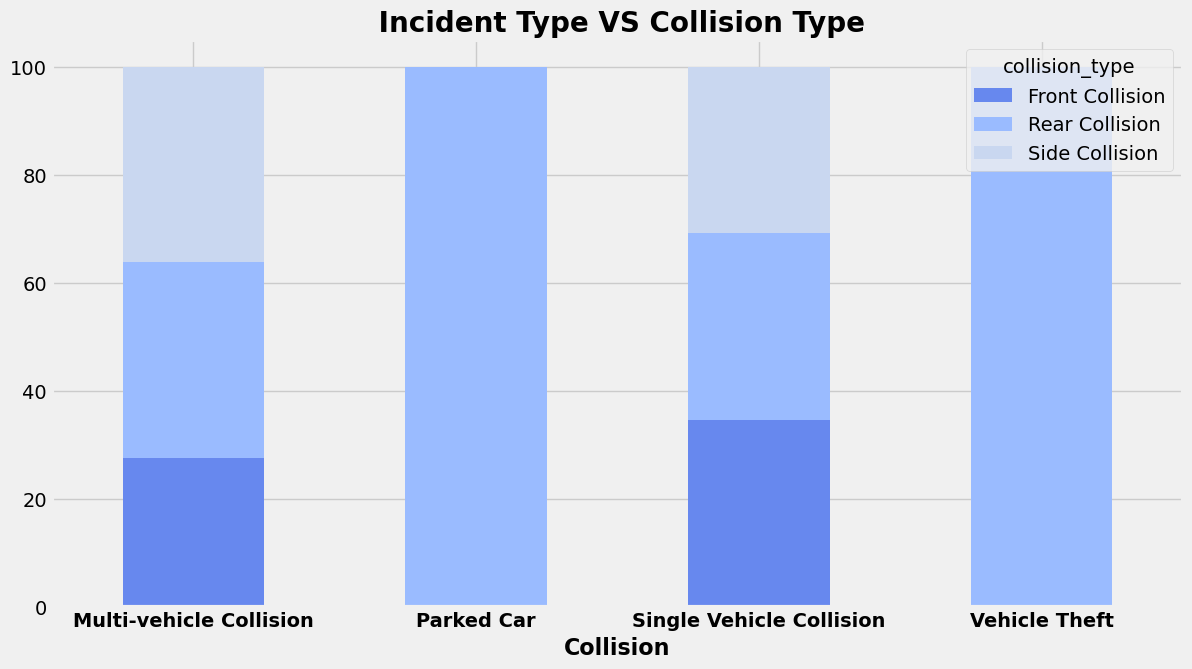

In [32]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

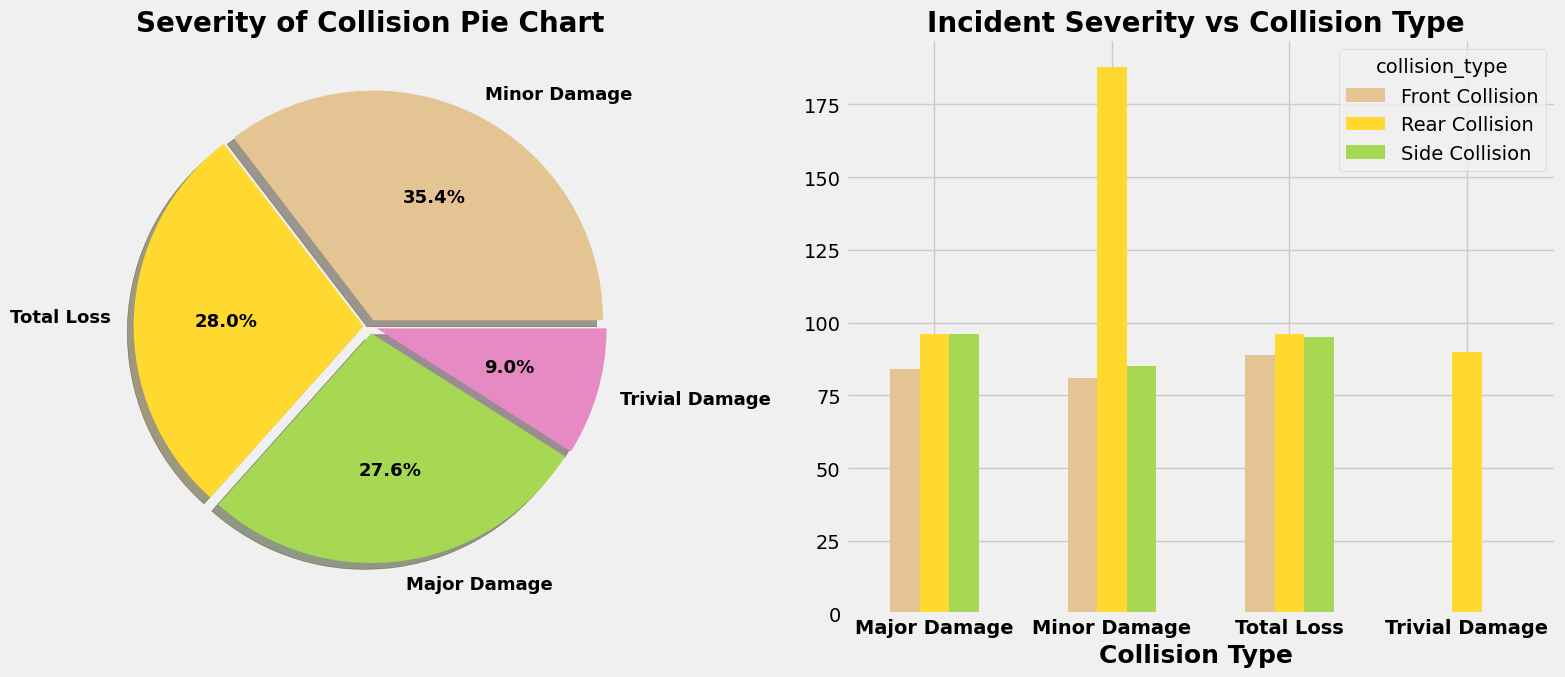

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

* minor damage ,total loss , Major damage are highest in number as compare to trivial damages.
* minor Damage have high rate of the Rear collision amoungest other.

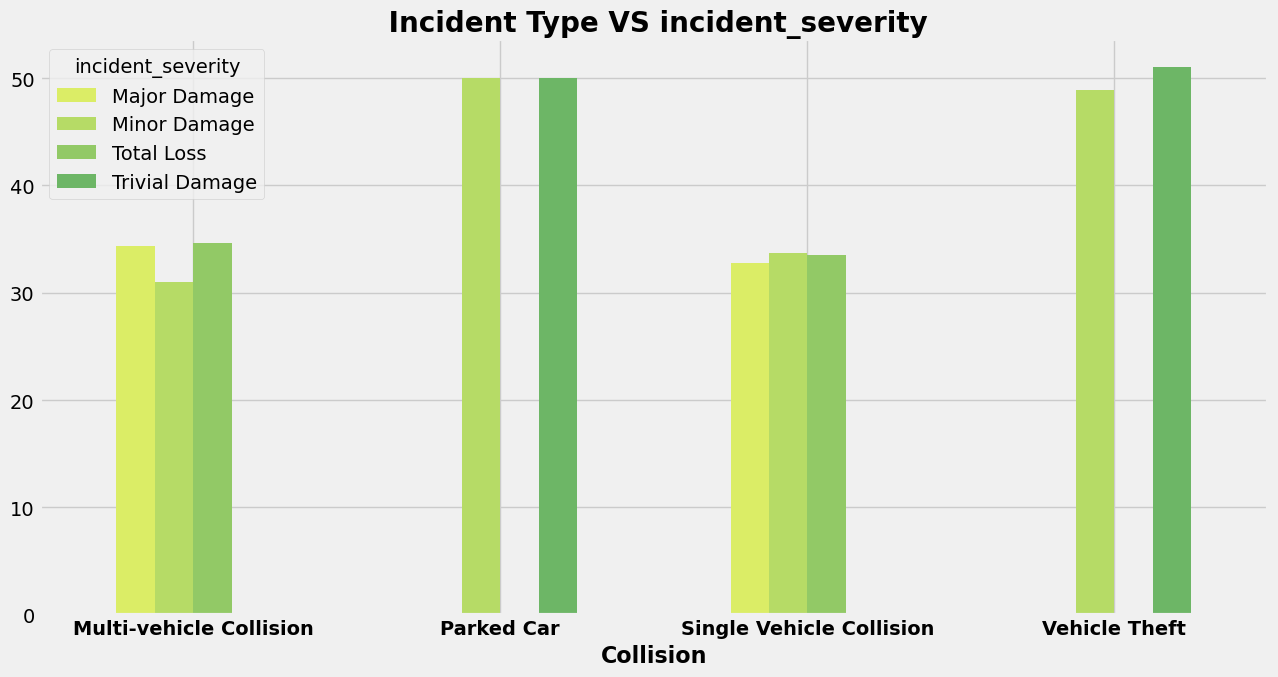

In [34]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

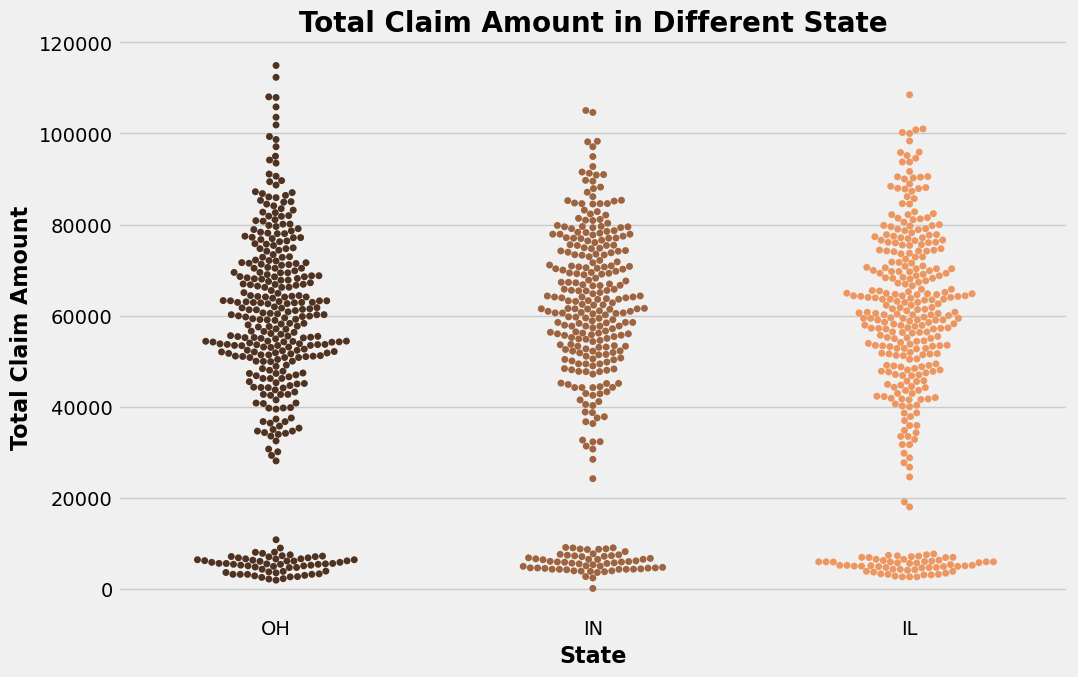

In [35]:
# swarmplot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 7)
sns.swarmplot(x=df['policy_state'], y=df['total_claim_amount'], palette='copper')
plt.title('Total Claim Amount in Different State', fontsize=20, fontweight='bold')
plt.xlabel('State', fontsize=16, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16, fontweight='bold')
plt.show()

## total claim in OH is highest.

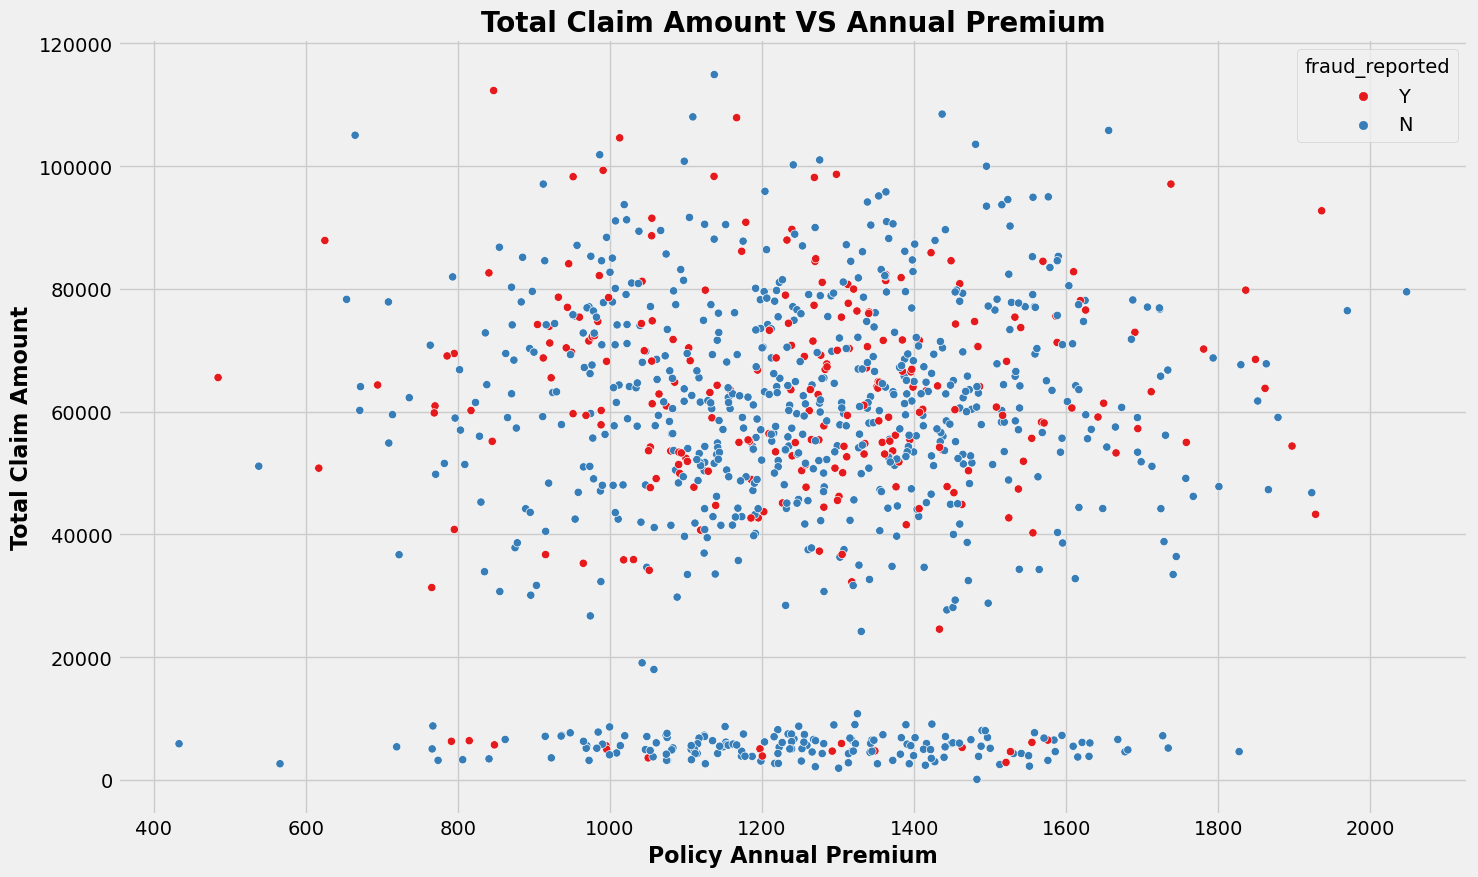

In [36]:
# scatter plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(x= df['policy_annual_premium'], y = df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

* The most cluster of the fraud pay 800 to 1600 permium and get 4 to 10 lakh .

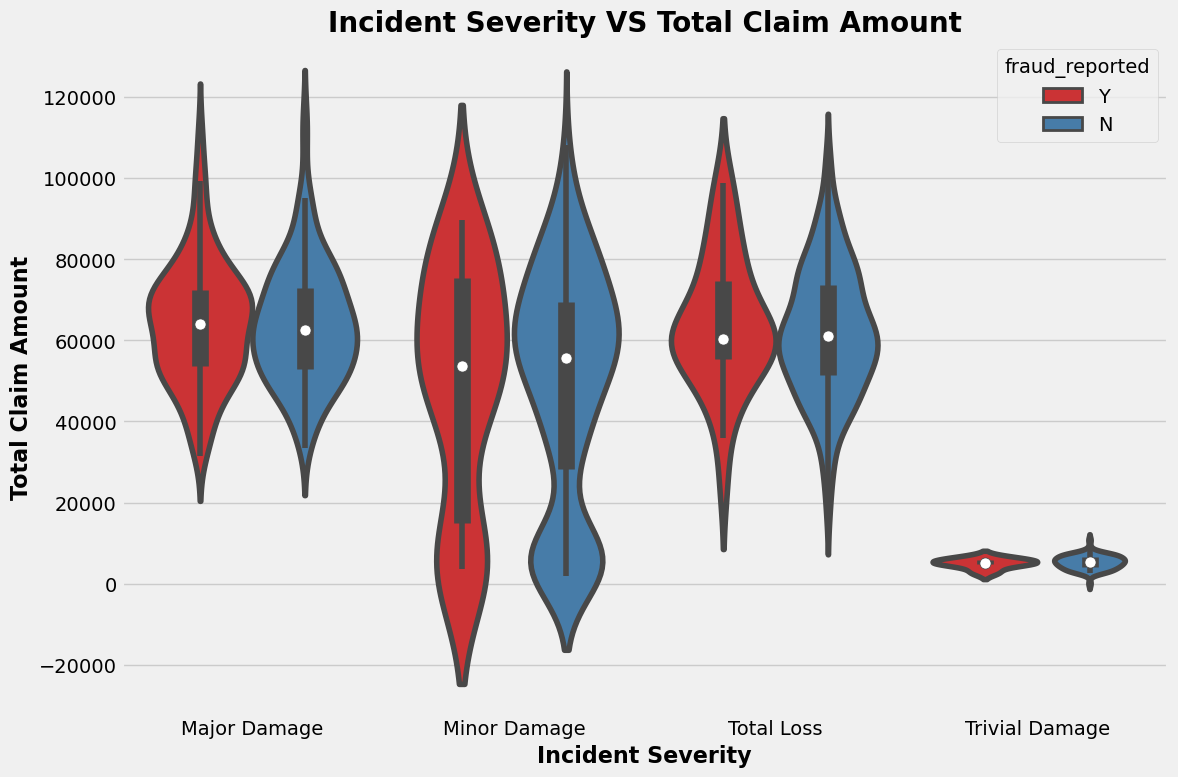

In [37]:
# violinplot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(x= df['incident_severity'],y= df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1',color='winter')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

##### highest number of fraud are range in minor DAmage

# Encoding the categorical columns

In [38]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  auto_year  fraud_reported  policy_bind_day  policy_bind_month  \
0           1       2004               1               17                 10   
1          12       2007               1               27                  6   
2          30       2007               0                9                  6   
3          34       2014               1               25                  5   
4          31       2009               0                6                  6   

   policy_bind_year  incident_day  incident_month  incident_year  \
0              2014            25     

## Outliers Detection 

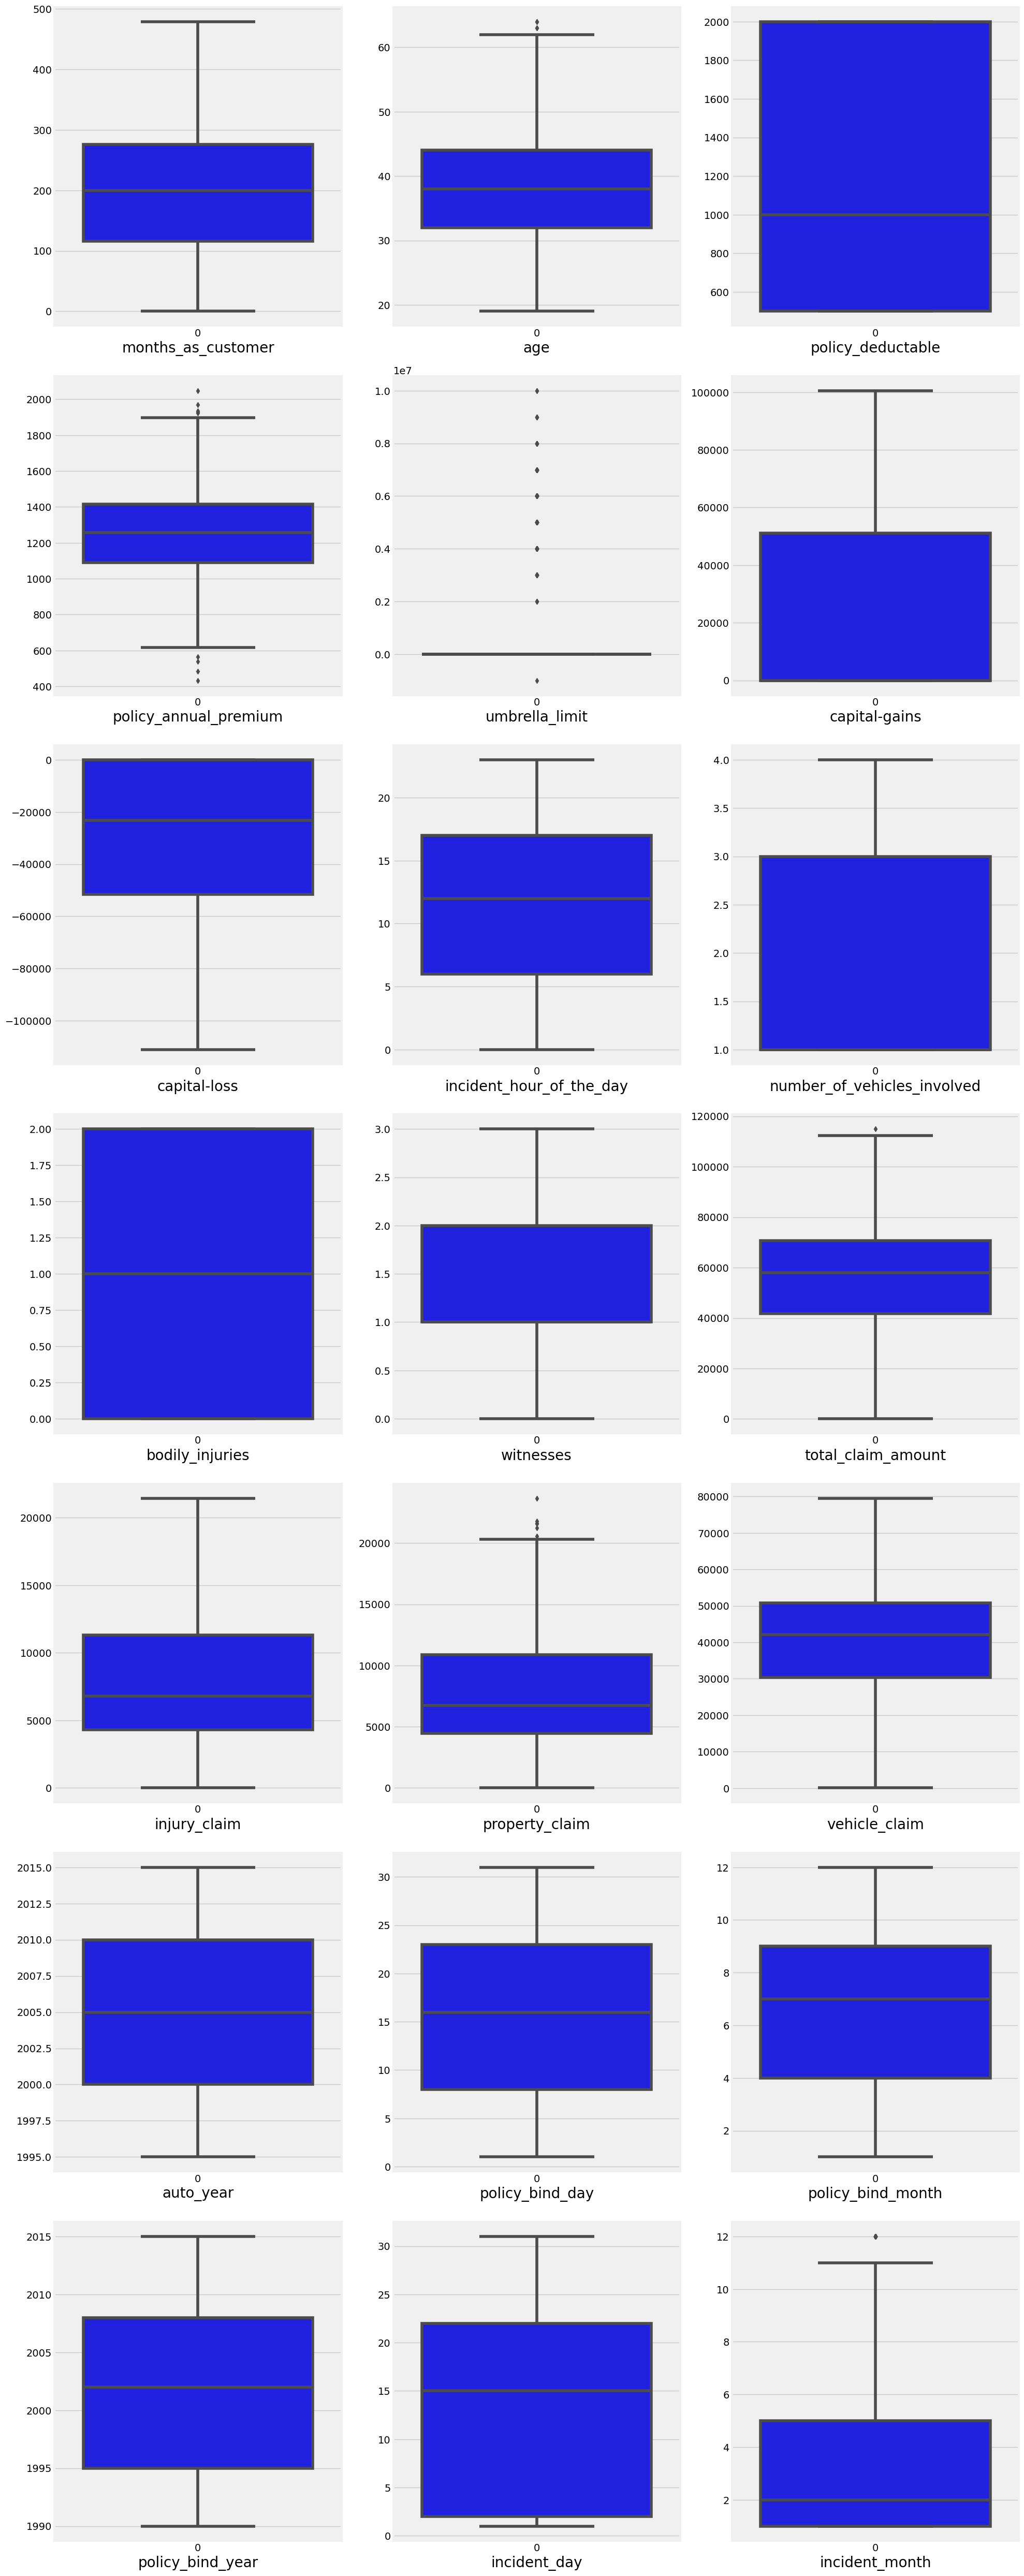

In [39]:
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1

for column in numerical_columns:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [40]:
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  auto_year  fraud_reported  policy_bind_day  policy_bind_month  \
0           1       2004               1               17                 10   
1          12       2007               1               27                  6   
2          30       2007               0                9                  6   
3          34       2014               1               25                  5   
4          31       2009               0                6                  6   

   policy_bind_year  incident_day  incident_month  incident_year  \
0              2014            25     

### Using Zscore to handle outliers


In [59]:
def remove_outliers_zscore(df, columns, z_threshold=3):
    for column in columns:       # Calculate Z-score for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())   # Remove rows where Z-score exceeds the threshold 
        df = df.drop(df.index[z_scores > z_threshold])
    
    return df

In [61]:
df = remove_outliers_zscore(df,df.columns)

## checking the skewness 

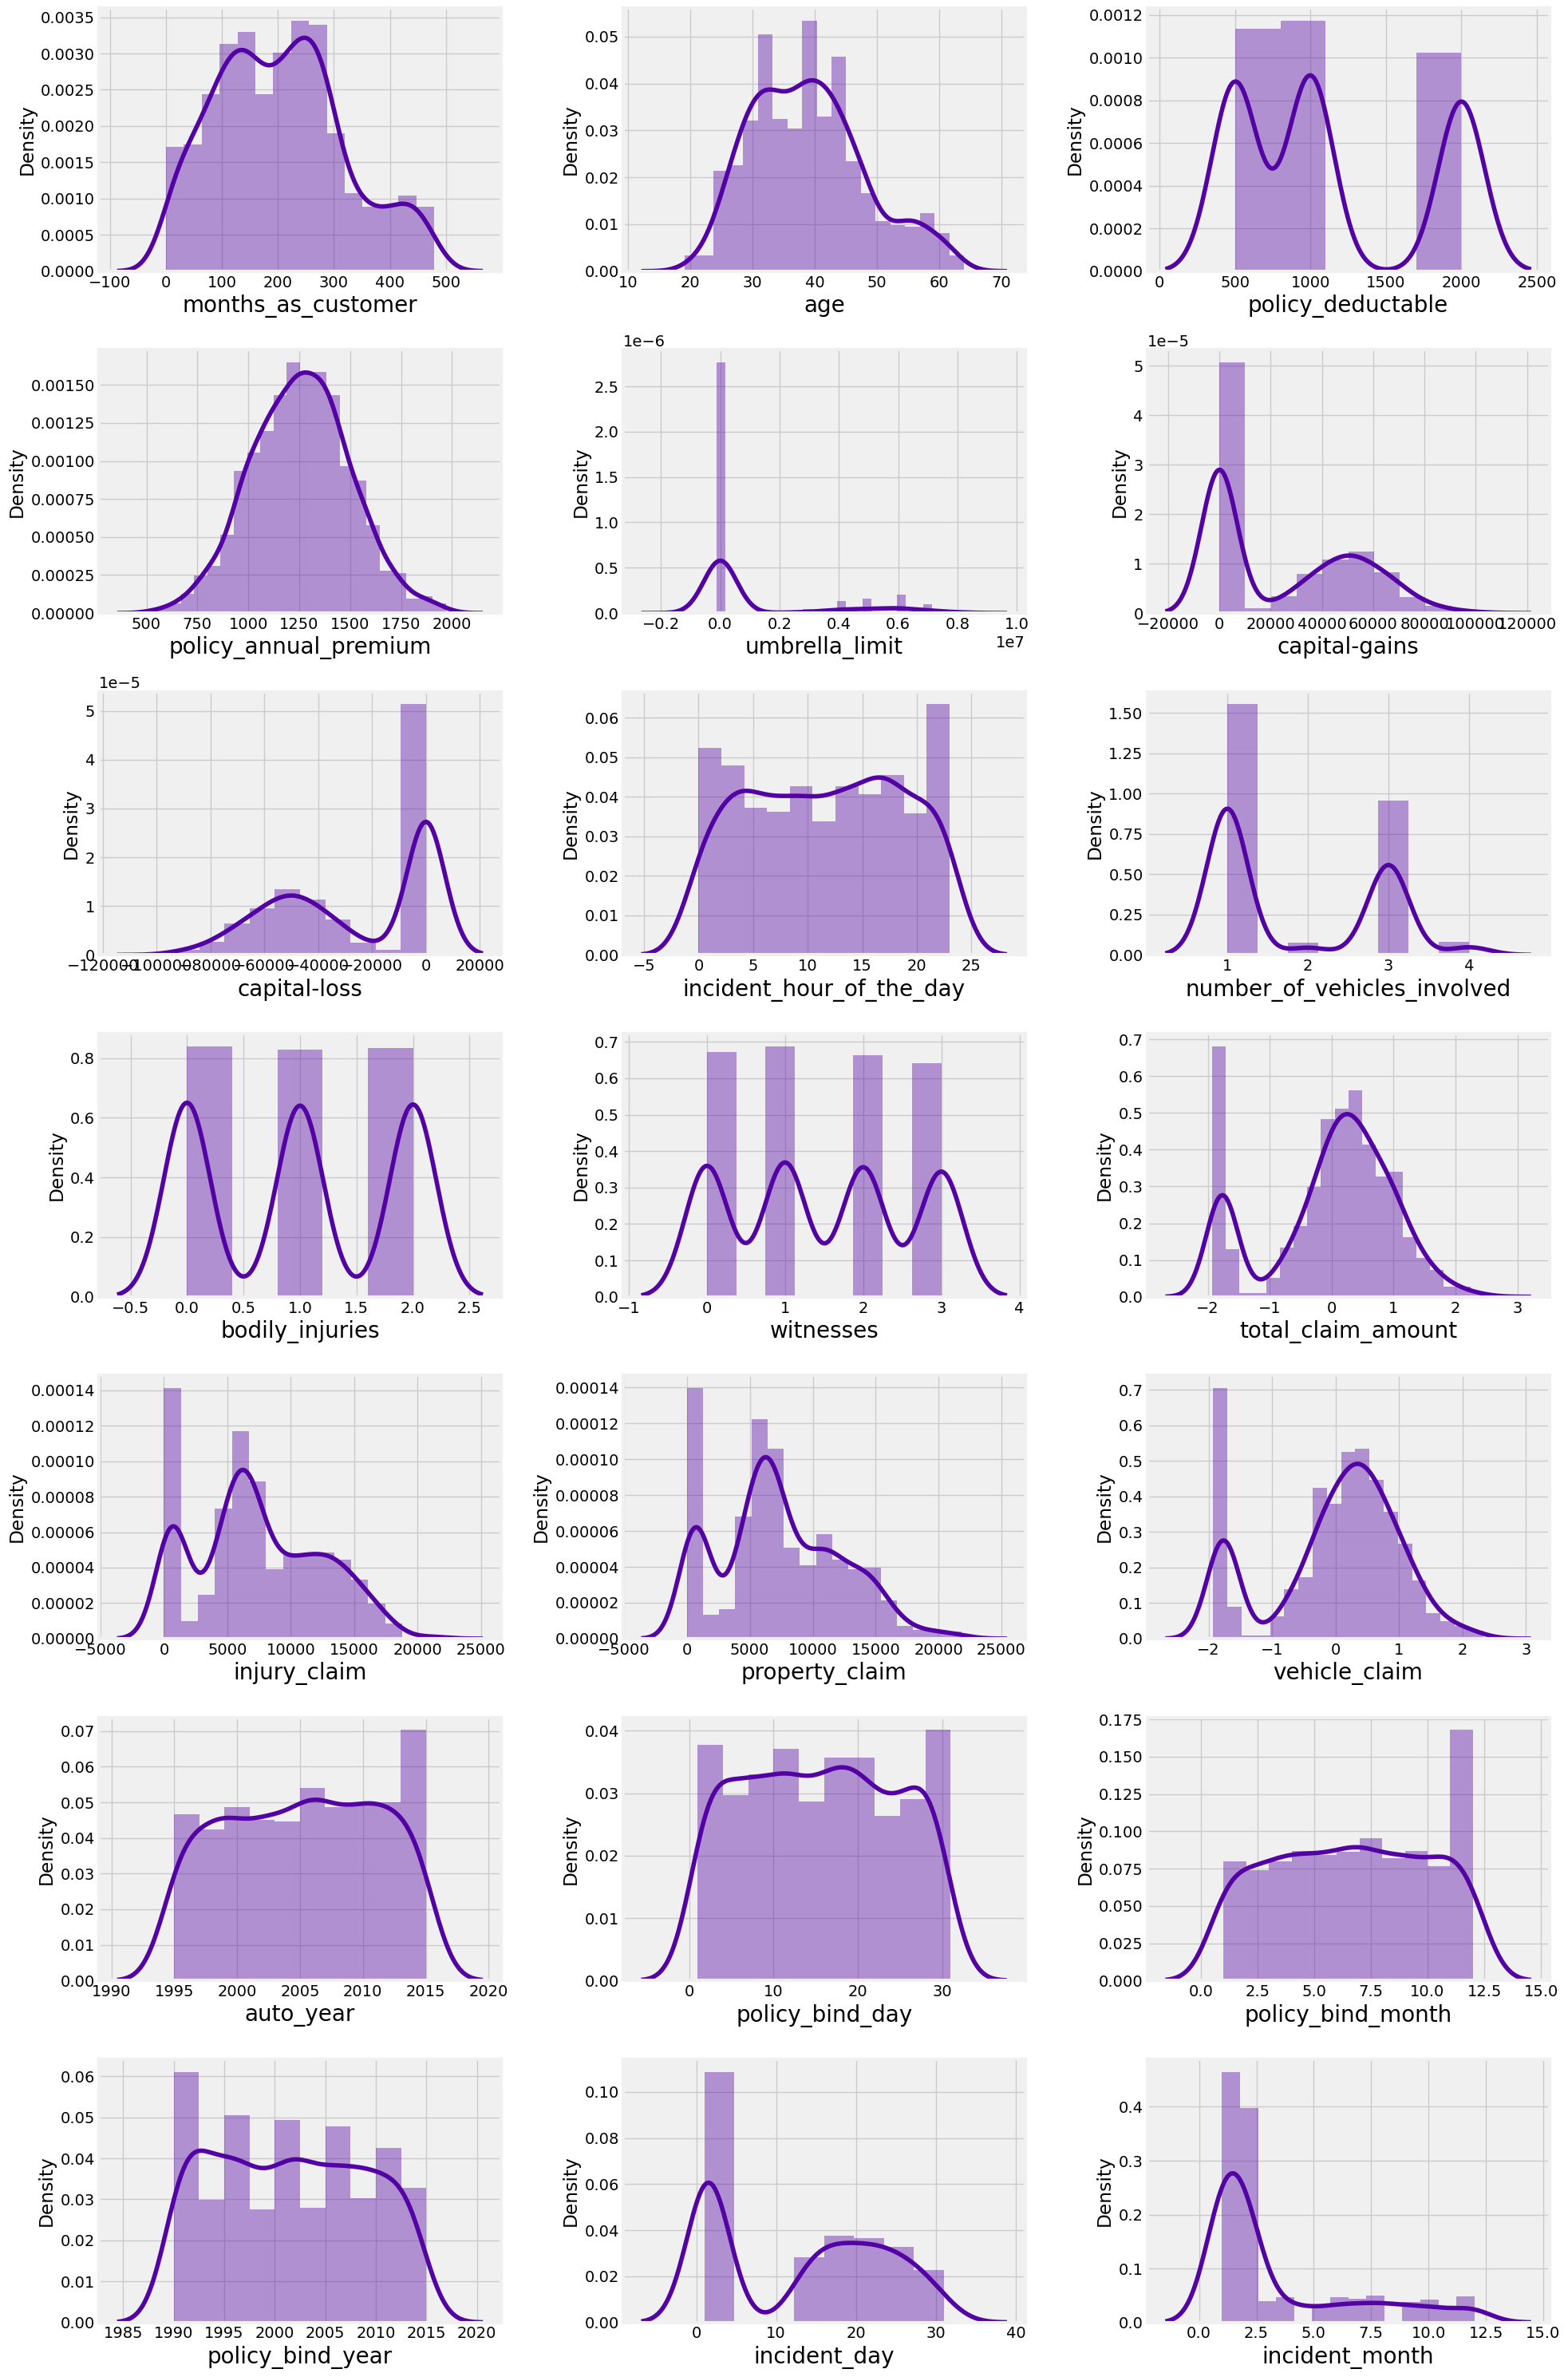

In [62]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in numerical_columns:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [63]:
df[numerical_columns].skew()

months_as_customer             0.364303
age                            0.478116
policy_deductable              0.478464
policy_annual_premium          0.035686
umbrella_limit                 1.776463
capital-gains                  0.470407
capital-loss                  -0.384896
incident_hour_of_the_day      -0.035145
number_of_vehicles_involved    0.505541
bodily_injuries                0.005597
witnesses                      0.029226
total_claim_amount            -0.509201
injury_claim                   0.270295
property_claim                 0.359937
vehicle_claim                 -0.524281
auto_year                     -0.054149
policy_bind_day                0.026616
policy_bind_month             -0.021949
policy_bind_year               0.060709
incident_day                   0.050882
incident_month                 1.386592
incident_year                  0.000000
dtype: float64

* Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.

We will use yeo-johnson method to transform negatively skewed data.

In [64]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [65]:
# checking after transformation
df[skew].skew()

total_claim_amount    0.051197
vehicle_claim         0.048625
dtype: float64

## Correlation

In [66]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922654     -0.003979   
age                                    0.922654  1.000000     -0.018274   
policy_state                          -0.003979 -0.018274      1.000000   
policy_deductable                      0.029014  0.029268      0.014318   
policy_annual_premium                 -0.004210  0.005341      0.013918   
umbrella_limit                         0.012183  0.009622     -0.022568   
insured_sex                            0.057838  0.073431     -0.019320   
insured_education_level               -0.002547  0.000495     -0.034504   
insured_occupation                     0.005735  0.013753     -0.027258   
insured_hobbies                       -0.091161 -0.079876     -0.038602   
insured_relationship                   0.067900  0.073960     -0.023188   
capital-gains                          0.007765 -0.005402      0.070839   
capital-loss                           0.019925  0.009817     -0.034865   
incident_type                         -0.017963 -0.026339      0.028102   
collision_type                        -0.075550 -0.079240      0.046220   
incident_severity                     -0.062922 -0.063932     -0.027324   
authorities_contacted                  0.011462  0.016564     -0.017344   
incident_state                         0.013142  0.011774      0.012345   
incident_city                         -0.004890 -0.004492     -0.006296   
incident_hour_of_the_day               0.065374  0.082768      0.024284   
number_of_vehicles_involved            0.011667  0.019582     -0.042126   
property_damage                       -0.001707 -0.009725     -0.013636   
bodily_injuries                       -0.008598 -0.014072      0.009009   
witnesses                              0.061634  0.055780      0.025044   
police_report_available               -0.016560 -0.018589      0.067348   
total_claim_amount                     0.063751  0.071275     -0.013859   
injury_claim                           0.066406  0.077340     -0.045613   
property_claim                         0.036649  0.061408     -0.001868   
vehicle_claim                          0.059117  0.058874     -0.003783   
auto_make                              0.048190  0.032650      0.013692   
auto_model                             0.001878  0.013836     -0.025573   
auto_year                              0.002059  0.006020      0.003824   
fraud_reported                         0.021653  0.013763      0.033416   
policy_bind_day                        0.053967  0.055801      0.000604   
policy_bind_month                      0.005194  0.014836      0.070918   
policy_bind_year                      -0.045609 -0.034519     -0.004423   
incident_day                          -0.010862 -0.006944      0.016449   
incident_month                         0.019957  0.018927      0.024735   
incident_year                               NaN       NaN           NaN   
CSL_Accidental                        -0.022346 -0.012761      0.001354   
CSL_Overall                            0.007718  0.010564      0.033511   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.029014              -0.004210   
age                                   0.029268               0.005341   
policy_state                          0.014318               0.013918   
policy_deductable                     1.000000              -0.006525   
policy_annual_premium                -0.006525               1.000000   
umbrella_limit                        0.007118              -0.014199   
insured_sex                          -0.007044               0.044626   
insured_education_level               0.015475              -0.021300   
insured_occupation                   -0.053856               0.029563   
insured_hobbies                       0.001570              -0.013264   
insured_relationship                 -0.018639               0.004761   
ca

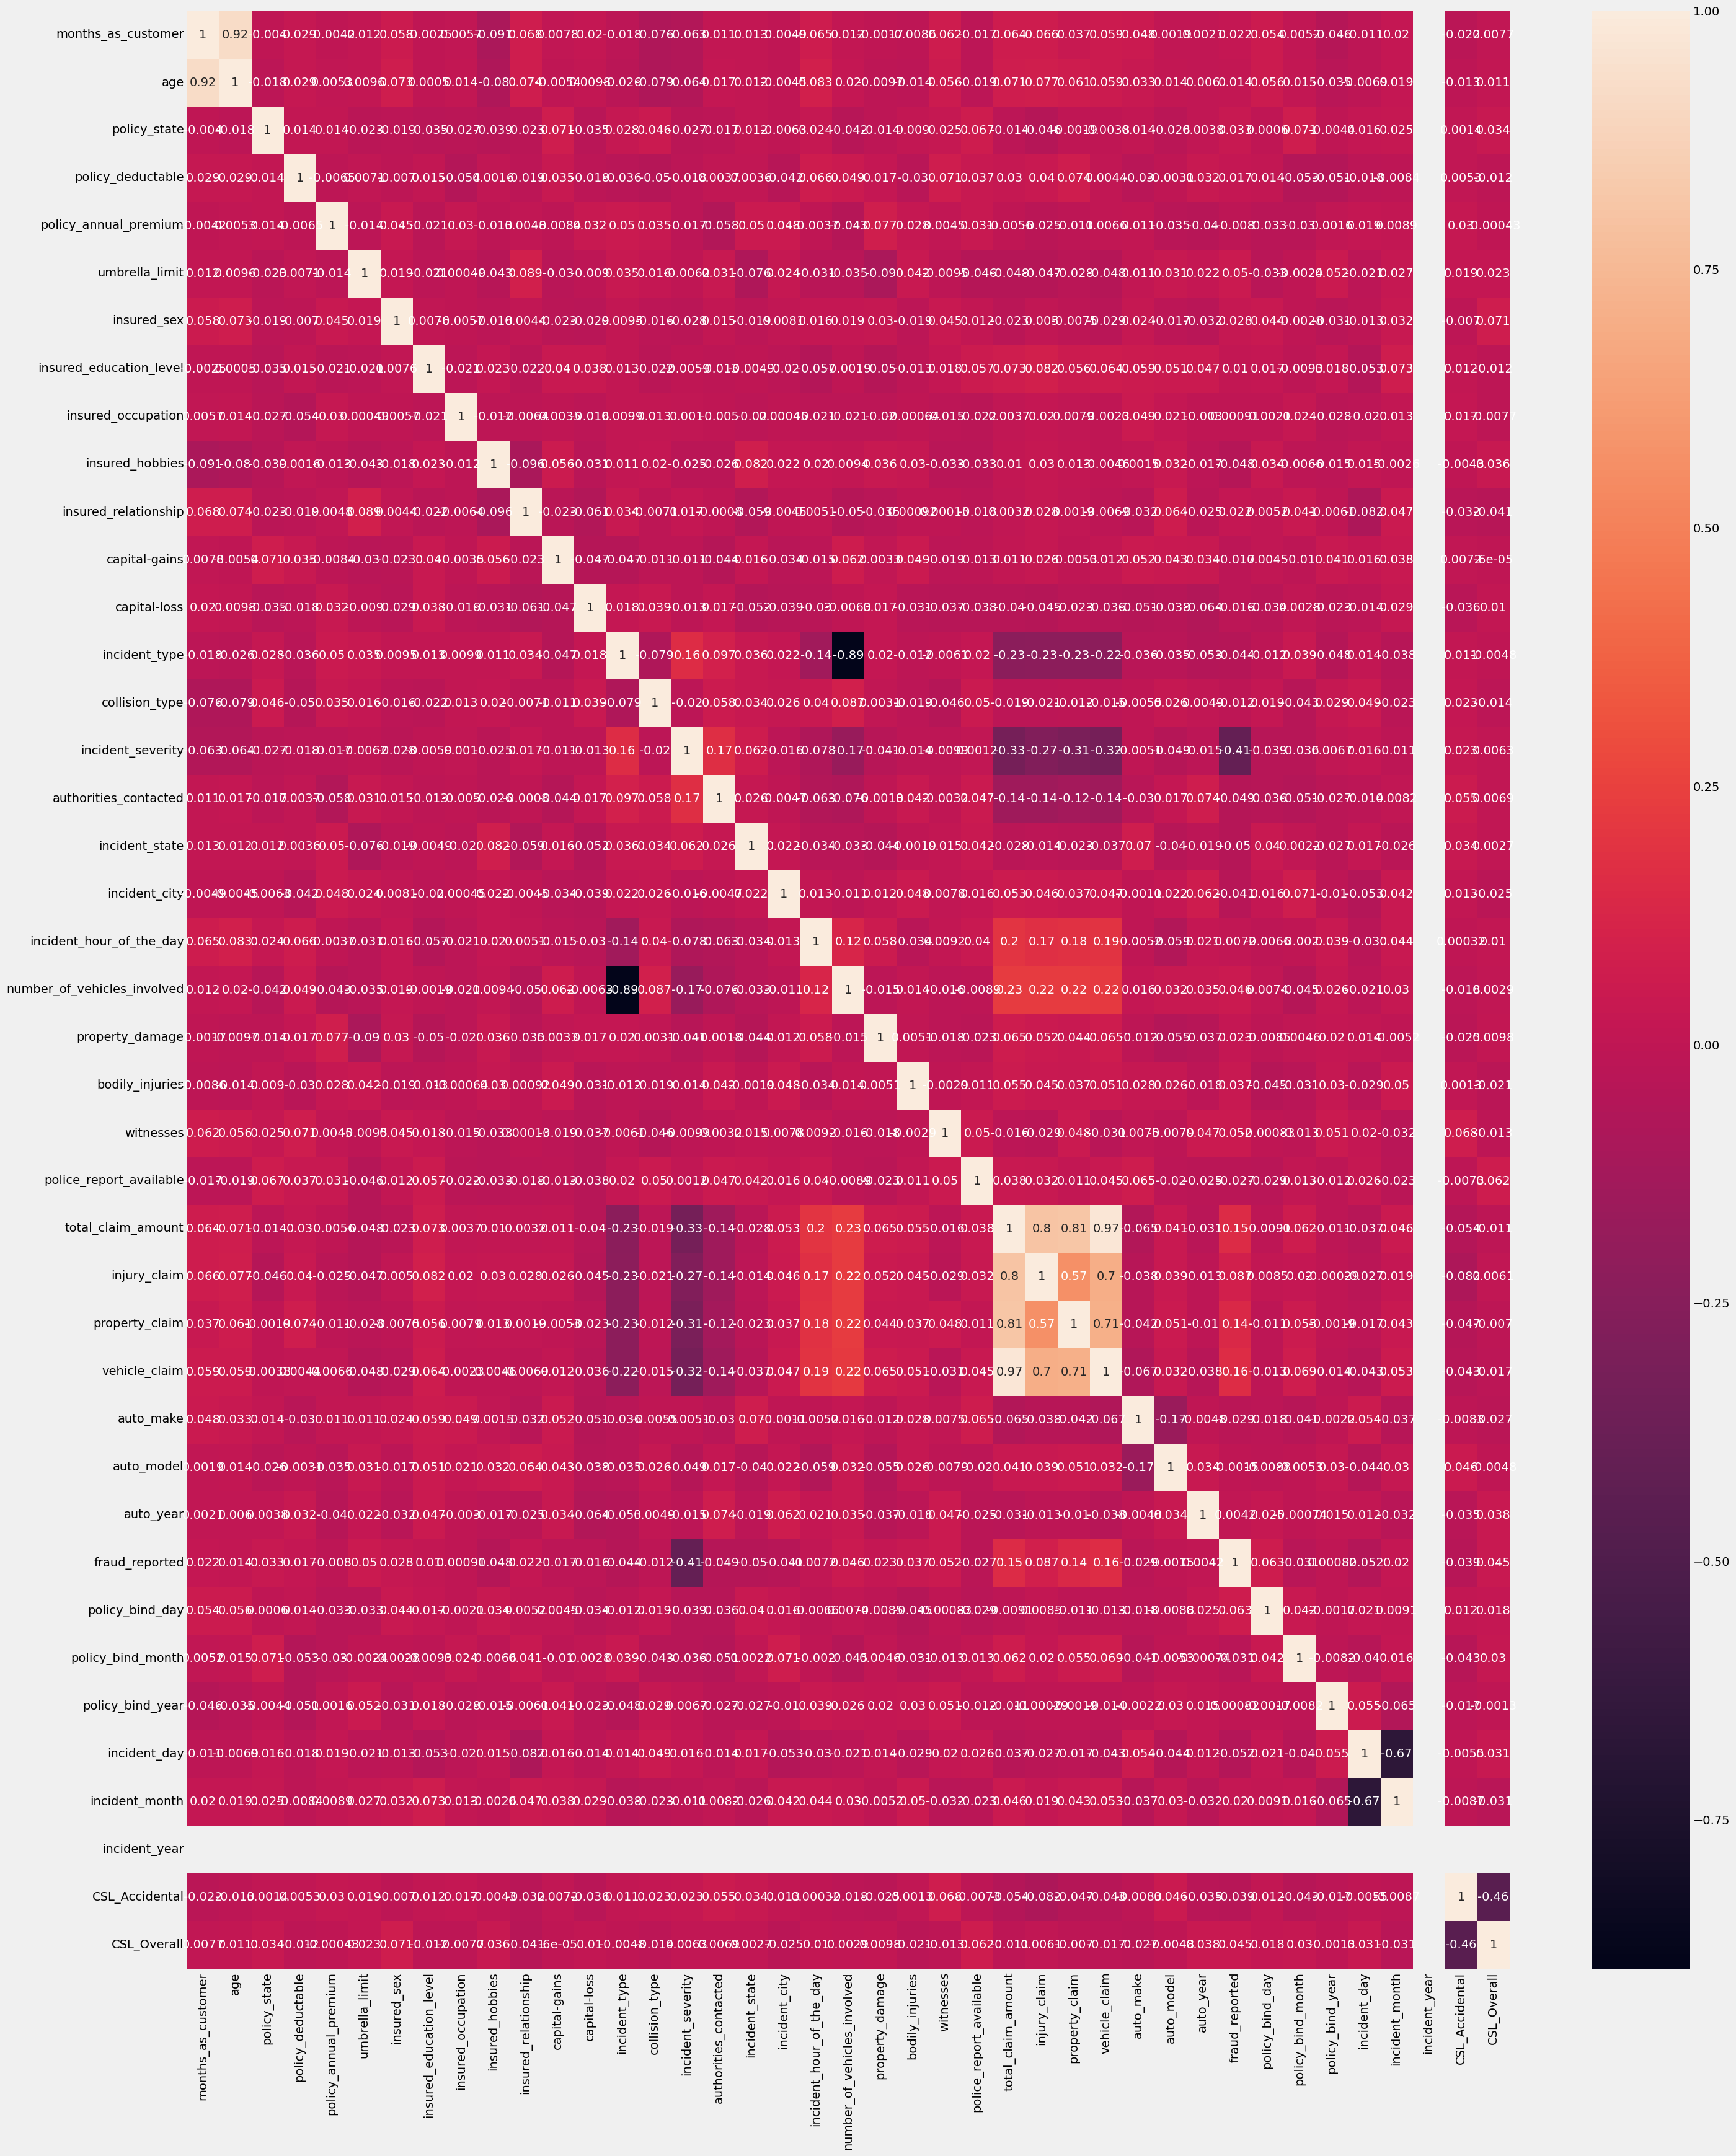

In [67]:
plt.figure(figsize=[30,35])
sns.heatmap(df.corr(),annot=True,)
plt.show()


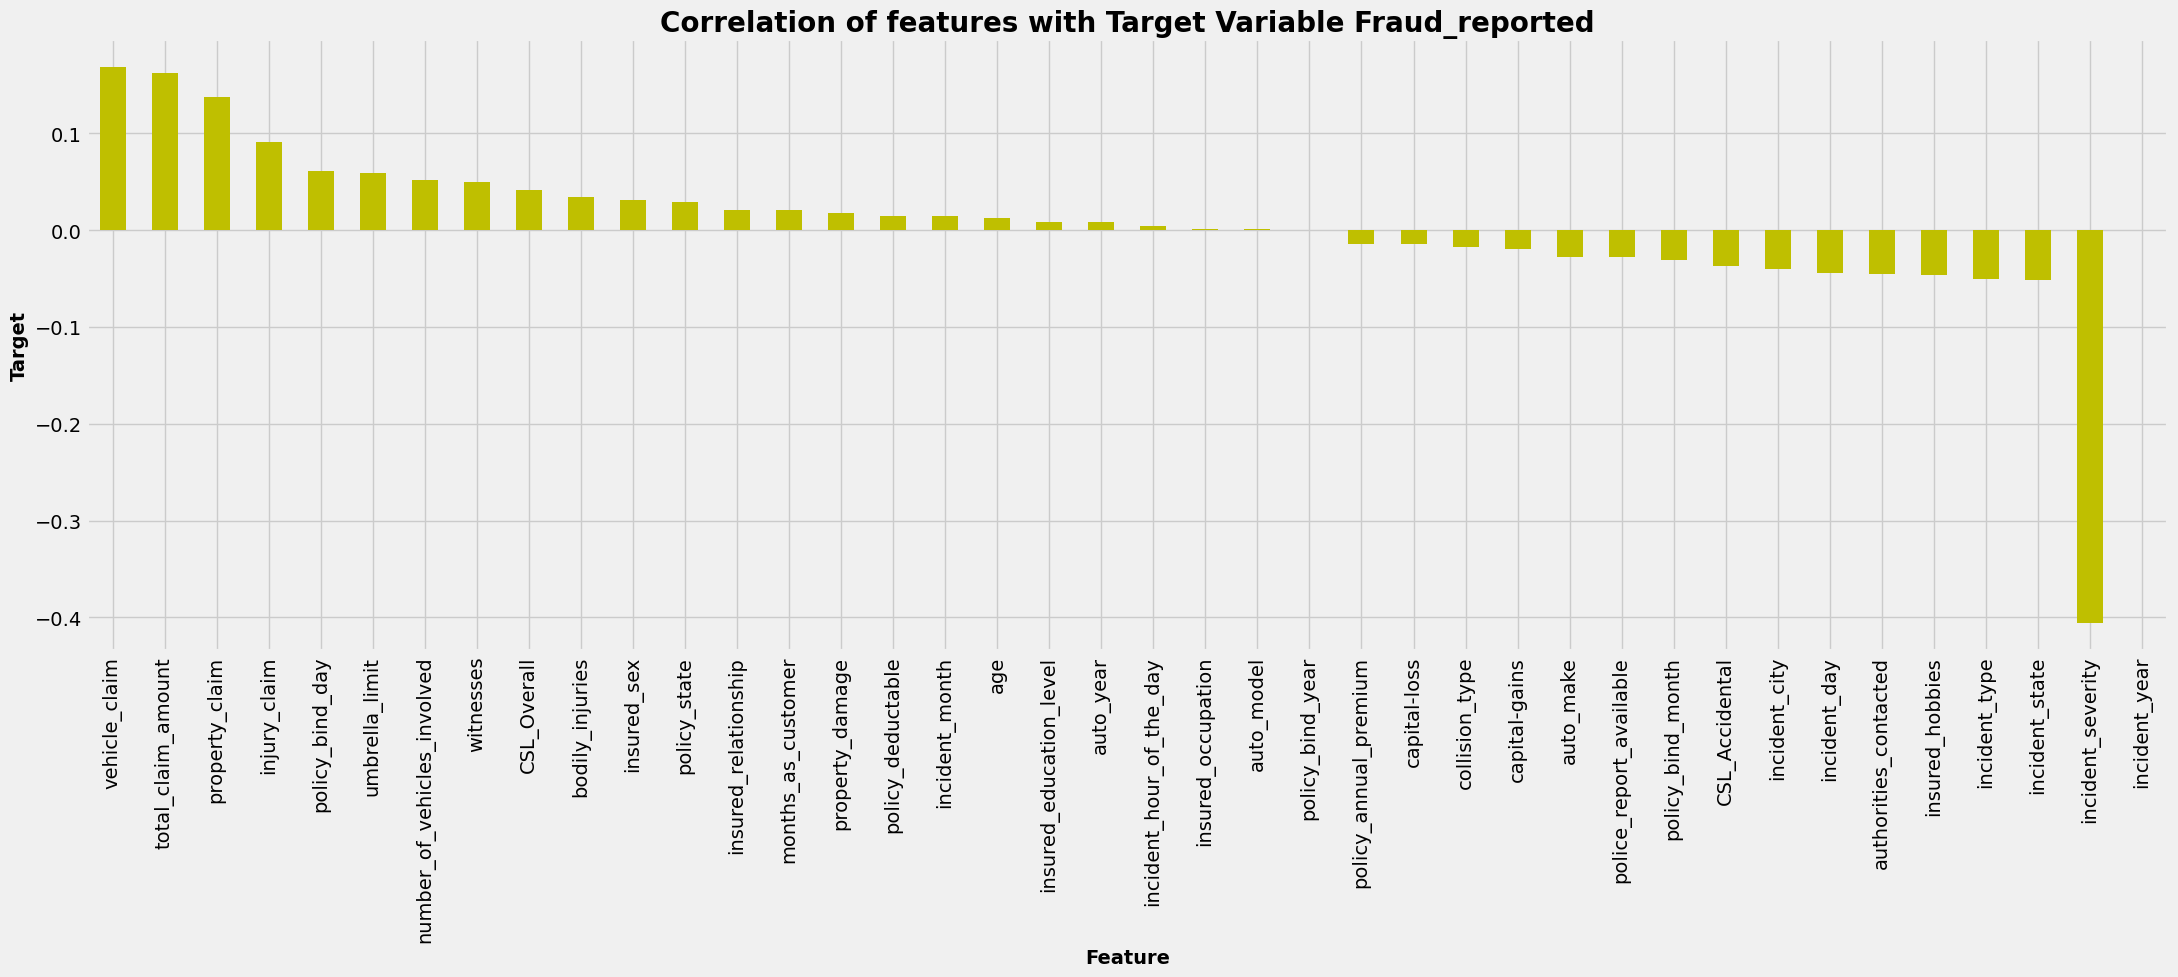

In [50]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

* Observation:
* incident_severity is correlated with target variable with correlation of - 0.4. Other variable are poorly correlated with target variable.
* Other variable are poorly correlated with target variable.
* injury_claim,property_claim,vehicle_claim are highly correlated with each other.
* incident_hour_of_the_day is highly negative correlated with incident type.

## Balanceing Imbalanced target feature

In [68]:
df.fraud_reported.value_counts()

0    745
1    243
Name: fraud_reported, dtype: int64

## Balancing using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
y = df['fraud_reported']
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

1    745
0    745
Name: fraud_reported, dtype: int64

* We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

## Using Standard Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Checking Multicollinearity between features using variance_inflation_factor

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0     7.006444           months_as_customer
1     7.001104                          age
2     1.066069                 policy_state
3     1.060150            policy_deductable
4     1.047551        policy_annual_premium
5     1.049509               umbrella_limit
6     1.084545                  insured_sex
7     1.070342      insured_education_level
8     1.039436           insured_occupation
9     1.073979              insured_hobbies
10    1.071698         insured_relationship
11    1.050990                capital-gains
12    1.078499                 capital-loss
13    3.819943                incident_type
14    1.106282               collision_type
15    1.351436            incident_severity
16    1.098952        authorities_contacted
17    1.082816               incident_state
18    1.053131                incident_city
19    1.113120     incident_hour_of_the_day
20    3.674338  number_of_vehicles_involved
21    1.061839              property_damage
22    1.050372              bodily_injuries
23    1.068460                    witnesses
24    1.114806      police_report_available
25  305.075664           total_claim_amount
26   16.467549                 injury_claim
27   18.146496               property_claim
28  142.105163                vehicle_claim
29    1.083344                    auto_make
30    1.081688                   auto_model
31    1.050496                    auto_year
32    1.041538              policy_bind_day
33    1.067176            policy_bind_month
34    1.038809             policy_bind_year
35    1.821041                 incident_day
36    1.844016               incident_month
37         NaN                incident_year
38    1.230042               CSL_Accidental
39    1.211650                  CSL_Overall

### Strategy to Address Multicollinearity :
* Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
* Another way to address Multicollinerity is to Scaled Data and then apply PCA.
### We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.

## Using PCA

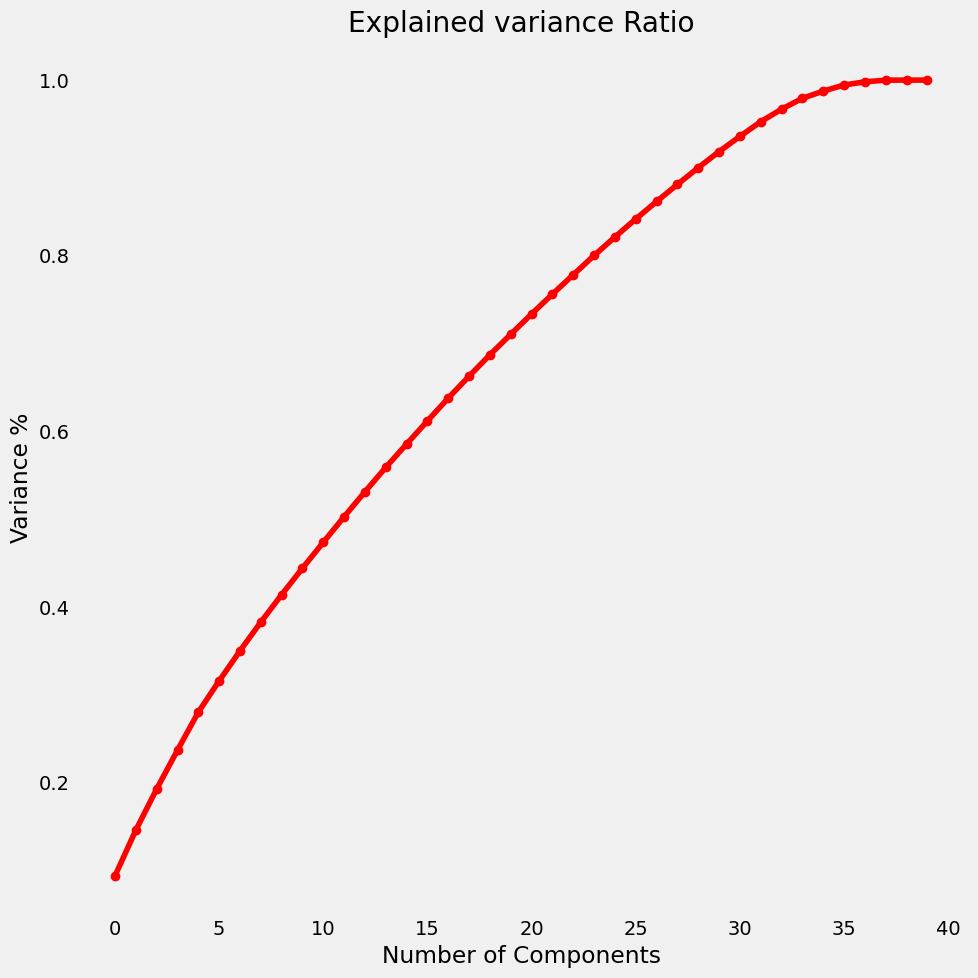

In [73]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 32 components for our prediction.

In [77]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [78]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Train test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=69, test_size=.3)

# Model Building

# Logistic Regression

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       222
           1       0.79      0.80      0.80       225

    accuracy                           0.80       447
   macro avg       0.80      0.80      0.80       447
weighted avg       0.80      0.80      0.80       447

Cross-Validation Scores: [0.59731544 0.67785235 0.80536913 0.84899329 0.8557047 ]
Mean Cross-Validation Score: 0.7570469798657719


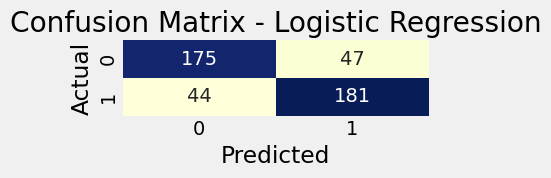

ROC AUC Score: 0.8659059059059059


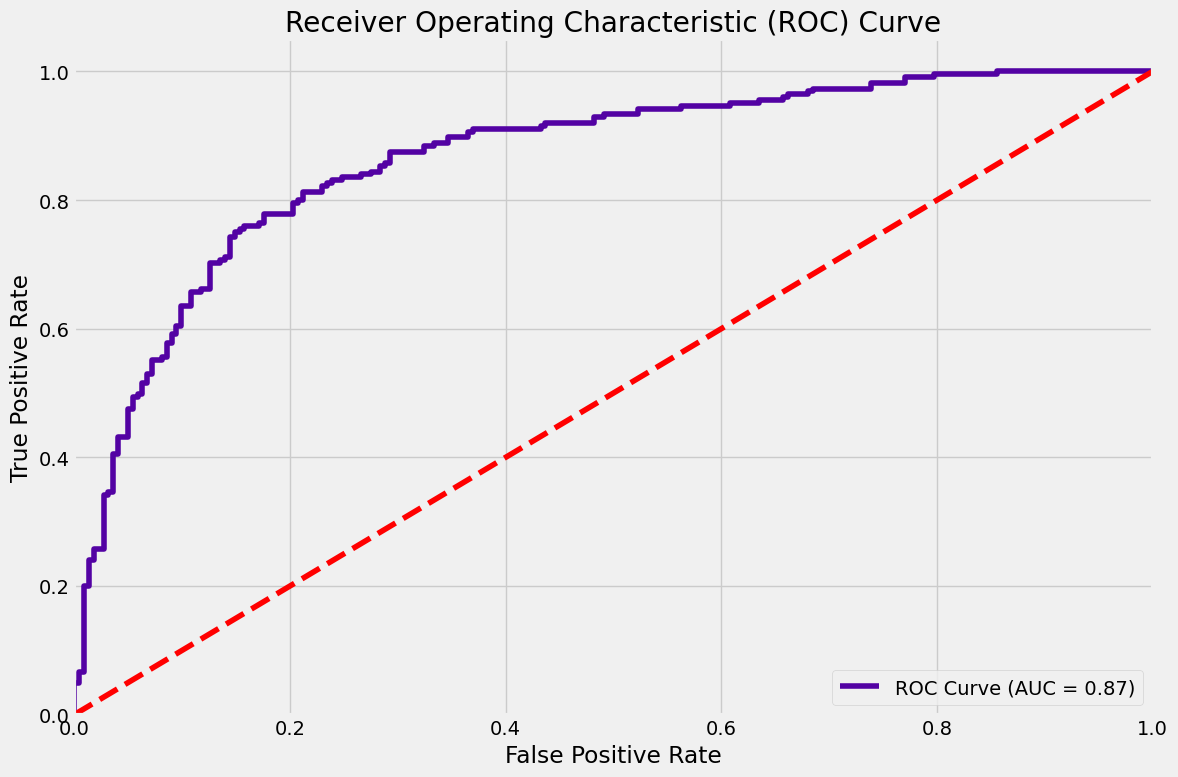

In [85]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, principle_x, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#  y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Decision Tree Classifier

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       222
           1       0.71      0.71      0.71       225

    accuracy                           0.71       447
   macro avg       0.71      0.71      0.71       447
weighted avg       0.71      0.71      0.71       447

Cross-Validation Scores: [0.57718121 0.61744966 0.74161074 0.75503356 0.75503356]
Mean Cross-Validation Score: 0.6892617449664429


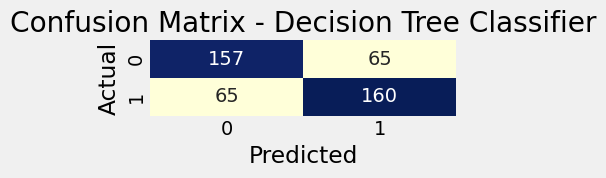

ROC AUC Score: 0.7091591591591592


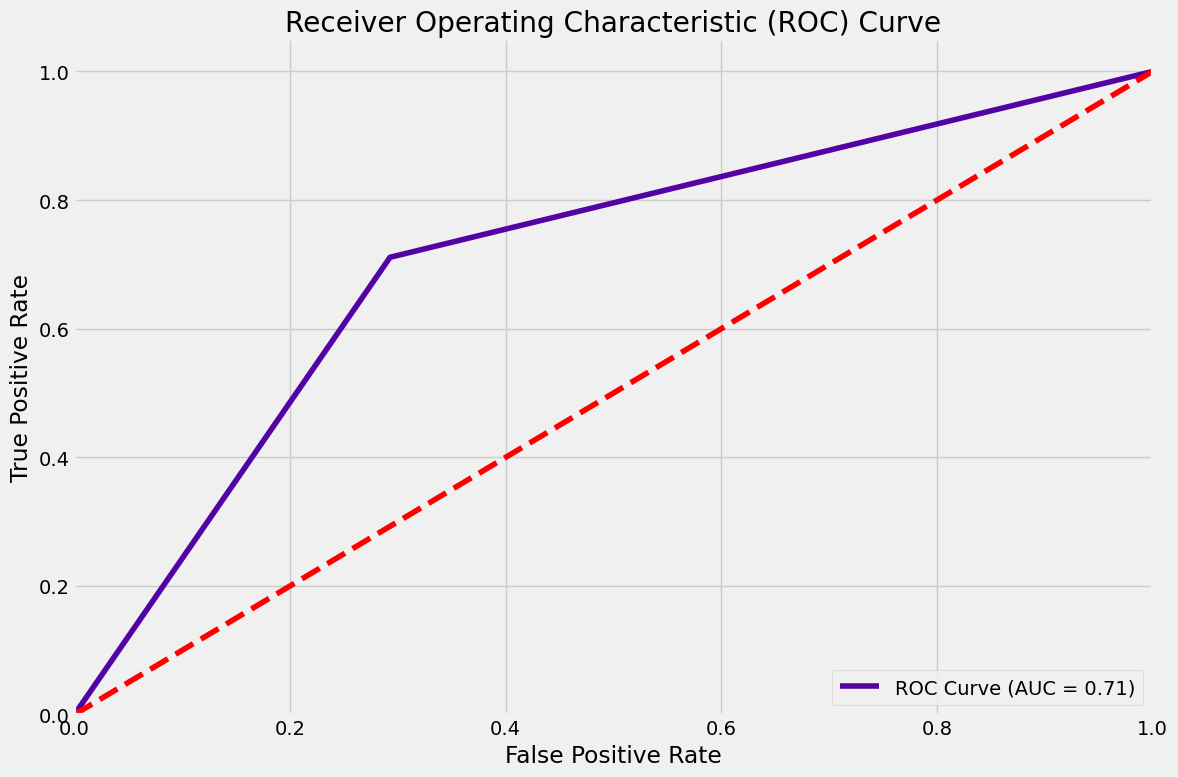

In [87]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, principle_x, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)


#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest Classifier

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       222
           1       0.85      0.79      0.82       225

    accuracy                           0.83       447
   macro avg       0.83      0.83      0.83       447
weighted avg       0.83      0.83      0.83       447

Cross-Validation Scores: [0.5704698  0.72147651 0.87248322 0.90268456 0.93288591]
Mean Cross-Validation Score: 0.7999999999999999


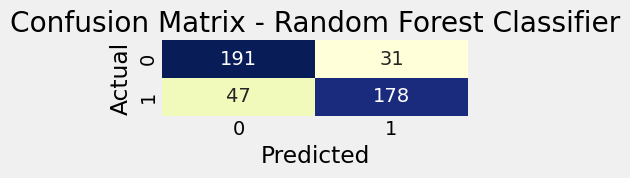

ROC AUC Score: 0.8924124124124125


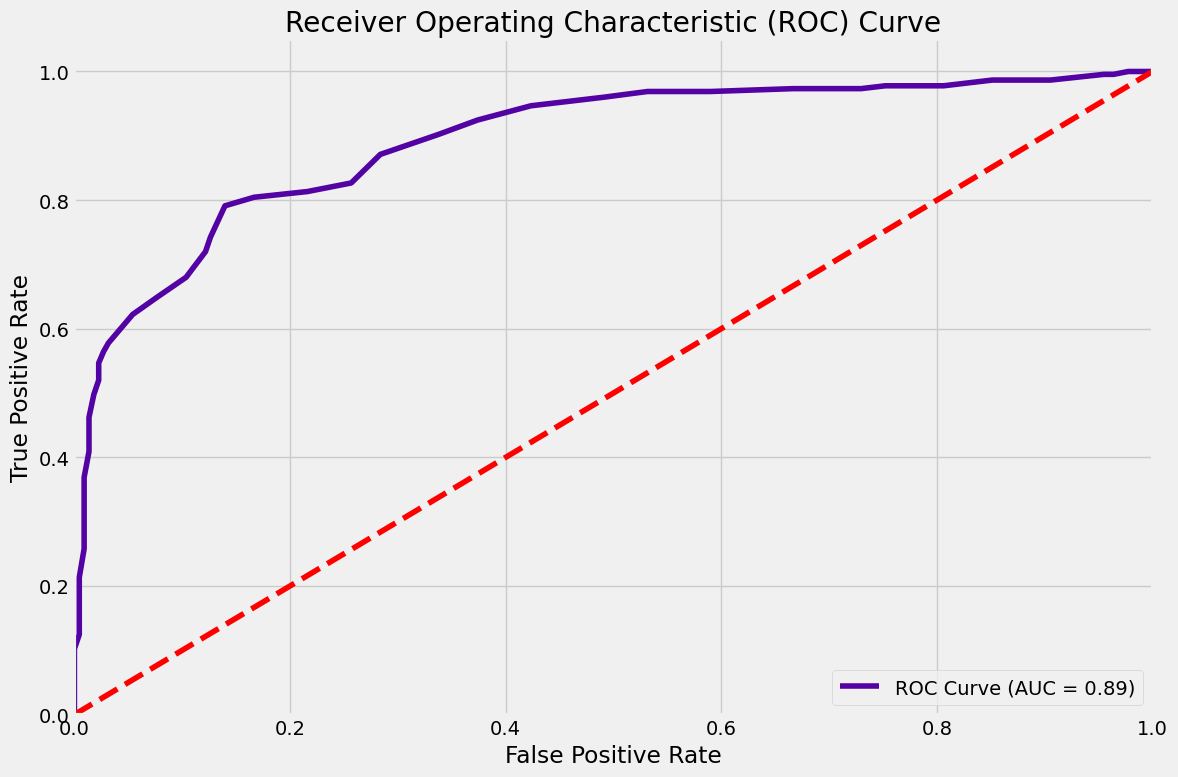

In [88]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, principle_x, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# K Neighbours Classifier

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.52      0.66       222
           1       0.67      0.95      0.78       225

    accuracy                           0.73       447
   macro avg       0.79      0.73      0.72       447
weighted avg       0.78      0.73      0.72       447

Cross-Validation Scores: [0.69798658 0.74496644 0.74496644 0.77516779 0.75503356]
Mean Cross-Validation Score: 0.7436241610738256


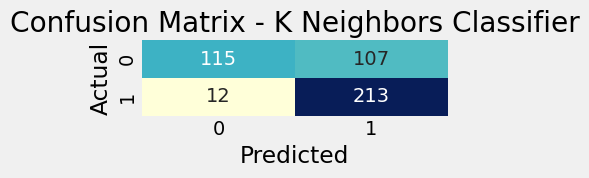

ROC AUC Score: 0.8614614614614615


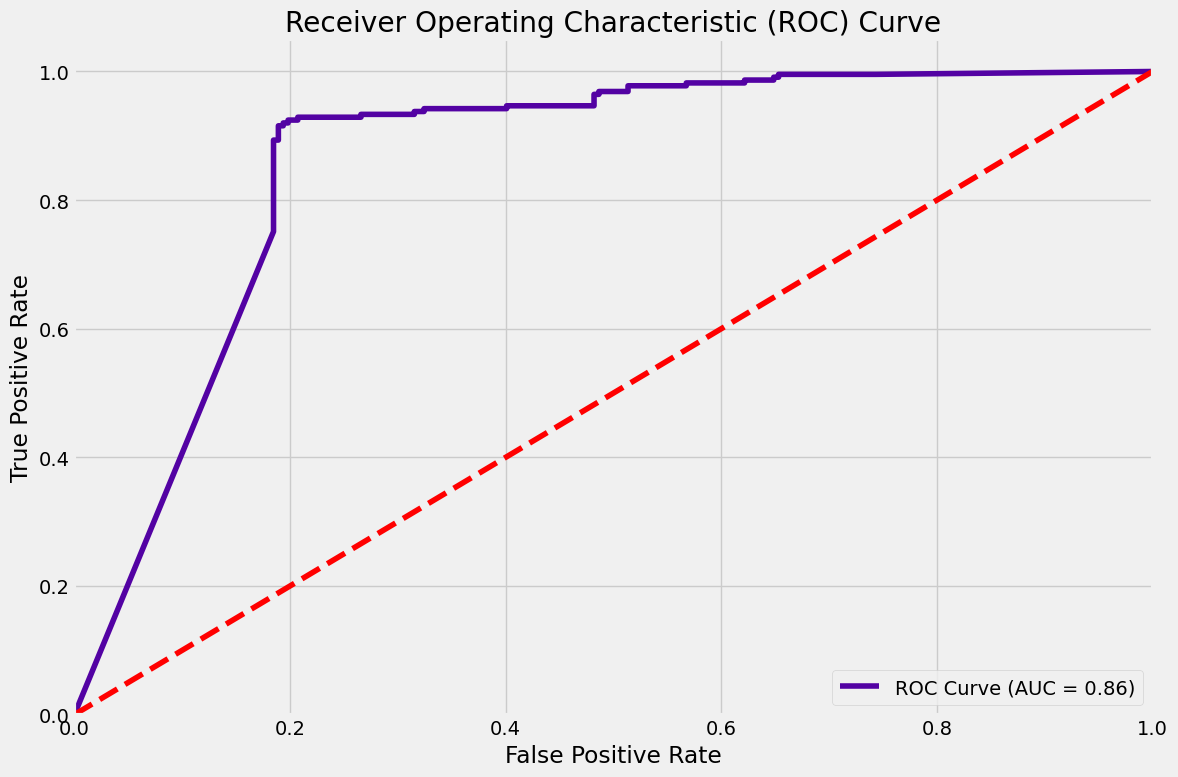

In [90]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(X_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(X_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_KN, principle_x, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_KN.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XGB Classifier

[15:31:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors", "p", "weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:31:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors", "p", "weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:31:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors

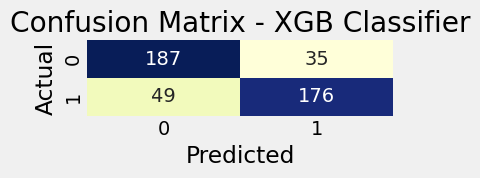

ROC AUC Score: 0.8764764764764765


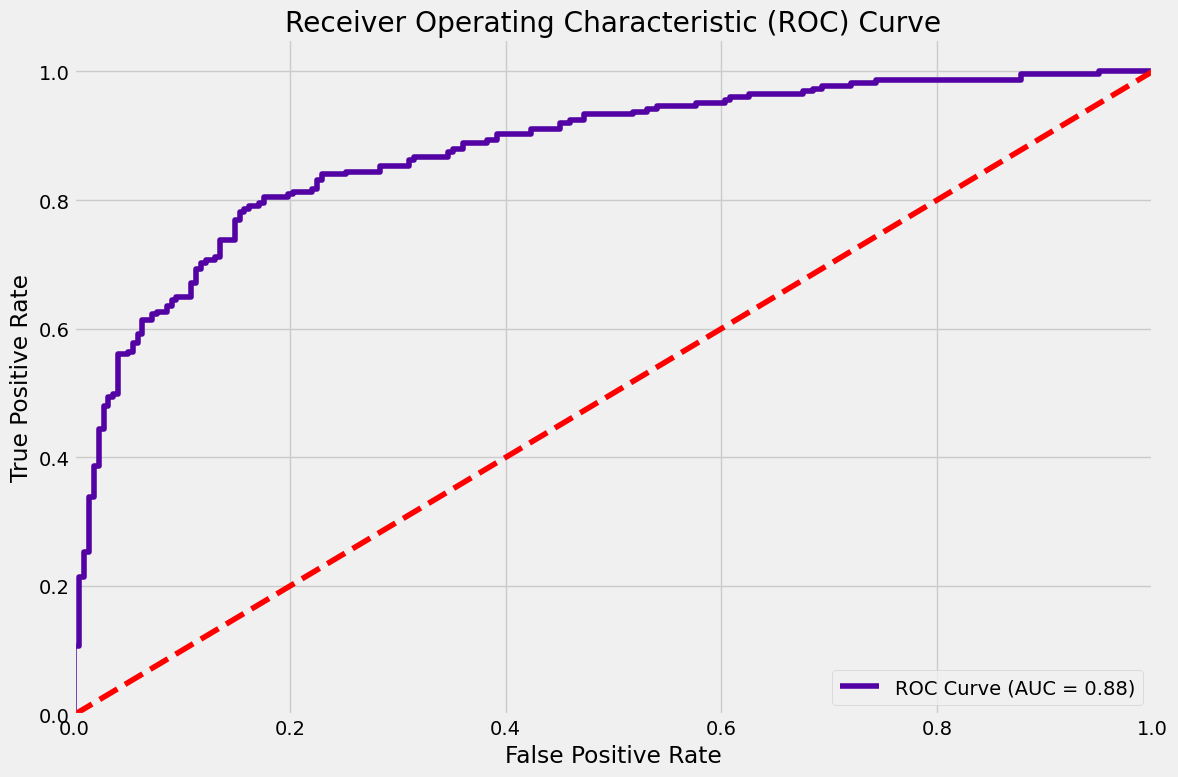

In [92]:
# Define the parameter grid
# n_jobs=-1 to allow run it on all cores
# Ignore the specific XGBoost warning
warnings.filterwarnings("ignore", message=".*min_samples_split.*")
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

# Create the Decision Tree Classifier
xgb = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_xg = XGBClassifier(**best_params)

# Fit the model on the training data
best_xg.fit(X_train, y_train)

# Make predictions on the test set
xg_y_pred = best_xg.predict(X_test)

print("Xgb Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, xg_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_xg, principle_x, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, xg_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - XGB Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_xg.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)


#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# creating dataset of the models

In [95]:
# Create a list of model names
model_names = [ 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression',"K Neighbors Classifier","XGB Classifer"]

# Create a list of models and their corresponding accuracy scores
models = [ RF, dt, LG,KN ,xgb]
accuracy_scores = [ accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred),accuracy_score(y_test, KN_y_pred),accuracy_score(y_test,xg_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                 Model Name  Accuracy Score
1  Random Forest Classifier        0.825503
2             XGB Classifer        0.812081
3       Logistic Regression        0.796421
4    K Neighbors Classifier        0.733781
5  Decision Tree Classifier        0.709172


## saving the model 

In [96]:
import pickle
with open('best_model','wb') as f:
    pickle.dump(best_RF,f)
pickle.dump(X_scale, open('scaler.pkl','wb'))